# **Import Package**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
!pip install yfinance
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import time
import math

# **1. Dataset**

# **Mengunduh Daset**

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Daftar ticker saham LQ45
tickers = [
    "ACES.JK", "ADMR.JK", "ADRO.JK", "AKRA.JK", "AMMN.JK", "AMRT.JK", "ANTM.JK", "ARTO.JK", "ASII.JK",
    "BBCA.JK", "BBNI.JK", "BBRI.JK", "BBTN.JK", "BMRI.JK", "BRIS.JK", "BRPT.JK", "BUKA.JK", "CPIN.JK",
    "ESSA.JK", "EXCL.JK", "GOTO.JK", "ICBP.JK", "INCO.JK", "INDF.JK", "INKP.JK", "INTP.JK", "ISAT.JK",
    "ITMG.JK", "JSMR.JK", "KLBF.JK", "MAPI.JK", "MBMA.JK", "MDKA.JK", "MEDC.JK", "MTEL.JK", "PGAS.JK",
    "PGEO.JK", "PTBA.JK", "SIDO.JK", "SMGR.JK", "SMRA.JK", "TLKM.JK", "TOWR.JK", "UNTR.JK", "UNVR.JK"
]

# Unduh data harga penutupan mingguan
data = yf.download(tickers, start='2014-11-04', end='2024-11-04', interval="1wk", rounding=True)['Close']
data.index = data.index.date

# Menampilkan data
print(data)

# Baris ini untuk menyimpan data ke file CSV
data.to_csv('lq45_stock_data.csv')

print("\nData berhasil disimpan ke file 'lq45_stock_data.csv'")

/tmp/ipython-input-783179255.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2014-11-04', end='2024-11-04', interval="1wk", rounding=True)['Close']
[*********************100%***********************]  45 of 45 completed


Ticker      ACES.JK  ADMR.JK  ADRO.JK  AKRA.JK  AMMN.JK  AMRT.JK  ANTM.JK  \
2014-11-03   576.70      NaN   423.87   581.09      NaN   471.24   633.21   
2014-11-10   584.05      NaN   387.10   570.13      NaN   471.24   633.21   
2014-11-17   598.74      NaN   416.13   564.05      NaN   466.75   663.68   
2014-11-24   591.39      NaN   418.07   565.87      NaN   471.24   663.68   
2014-12-01   580.37      NaN   433.55   550.66      NaN   457.78   653.52   
...             ...      ...      ...      ...      ...      ...      ...   
2024-09-30   803.44   1505.0  3363.27  1493.38   8875.0  3108.99  1452.67   
2024-10-07   831.47   1430.0  3416.23  1424.02   9150.0  3128.73  1490.77   
2024-10-14   878.18   1430.0  3336.79  1336.18   9800.0  3316.26  1547.93   
2024-10-21   854.82   1400.0  3230.86  1303.81   9225.0  3434.69  1509.83   
2024-10-28   840.81   1390.0  3345.61  1248.33   9025.0  3197.82  1447.91   

Ticker      ARTO.JK  ASII.JK   BBCA.JK  ...  PGAS.JK  PGEO.JK  PTBA.JK  \
2

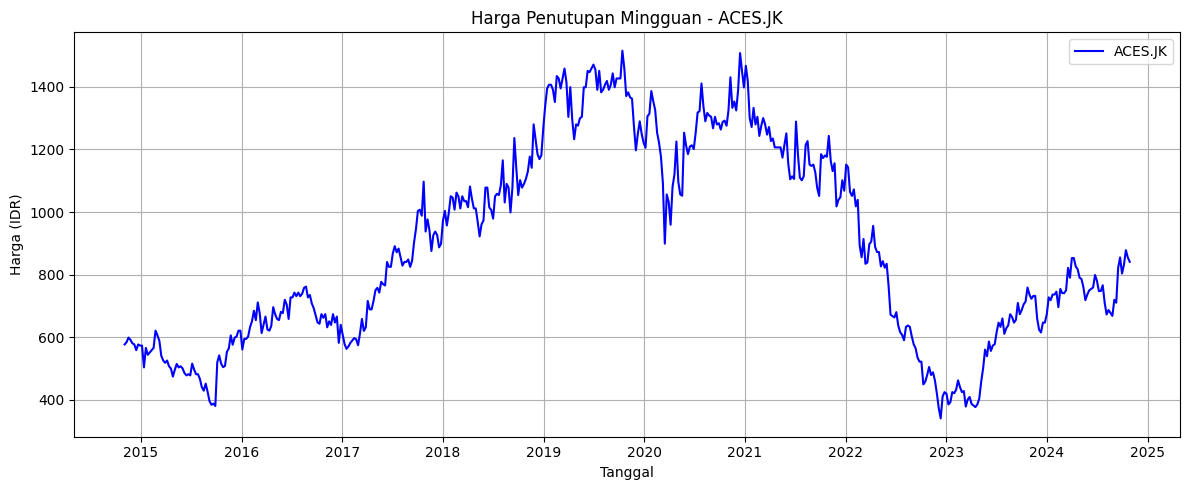

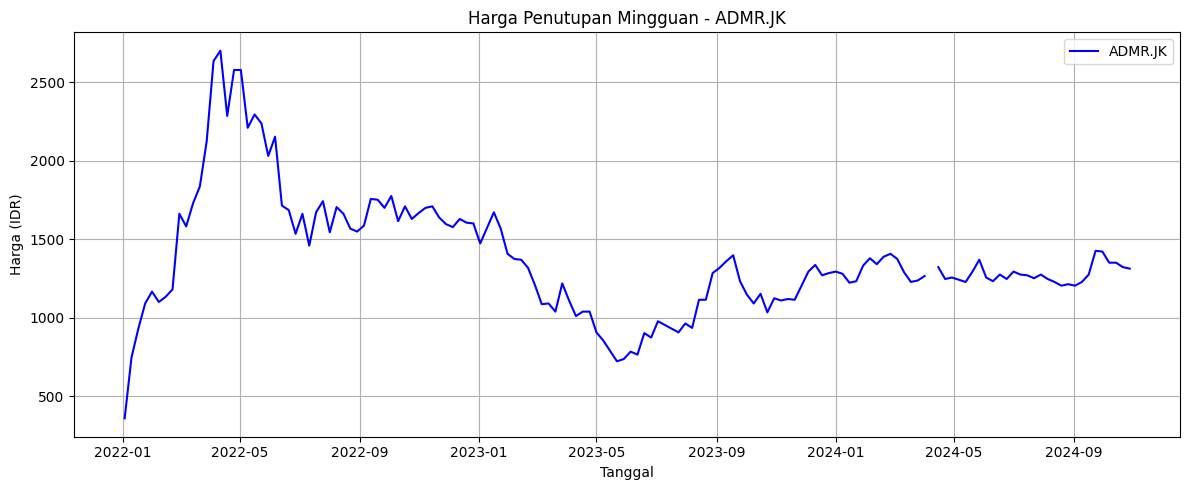

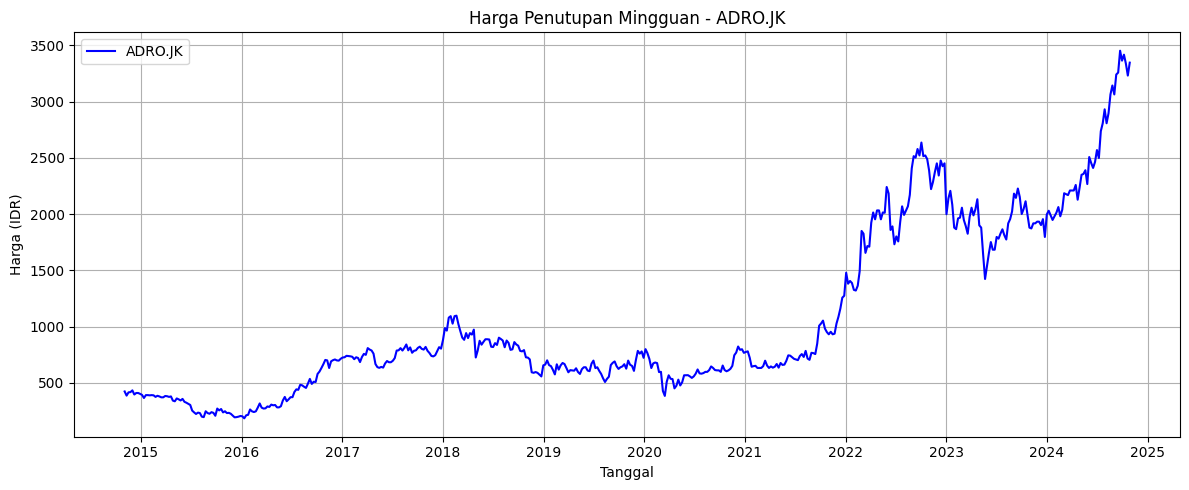

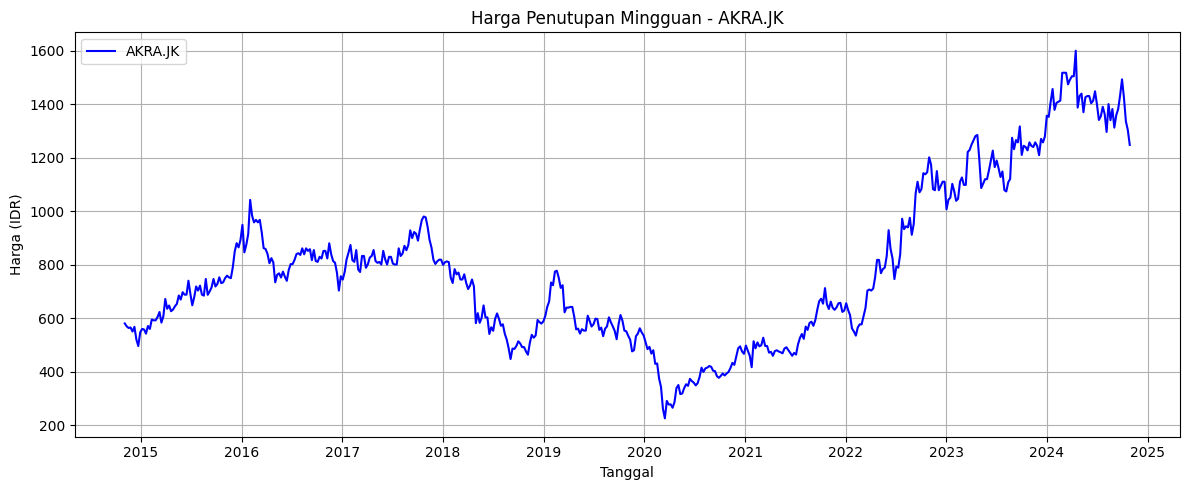

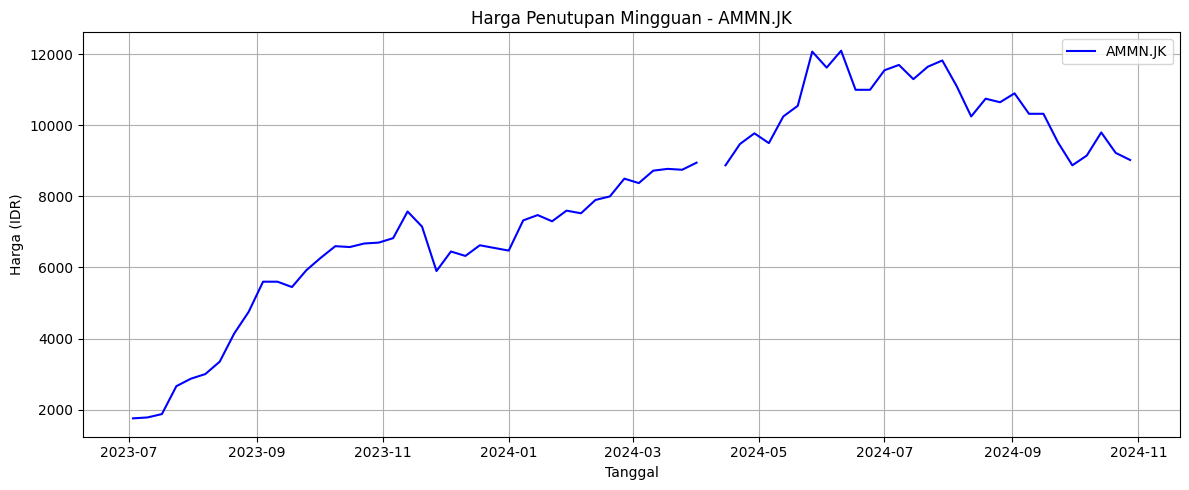

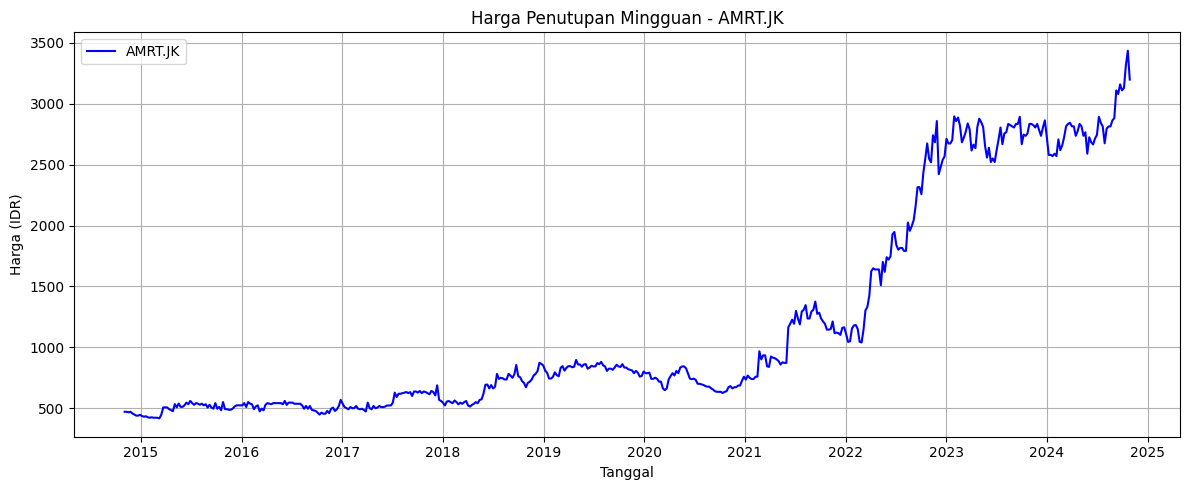

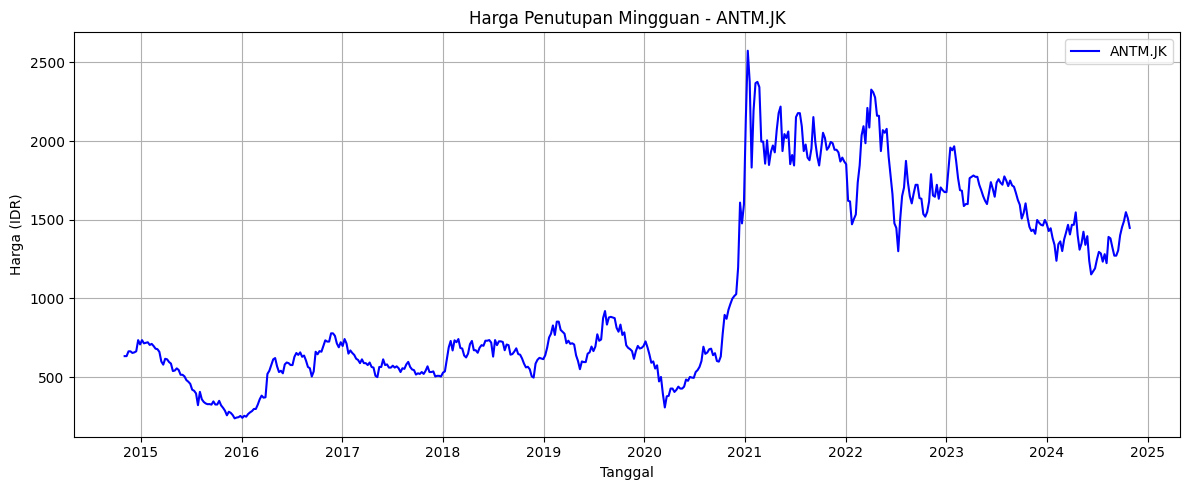

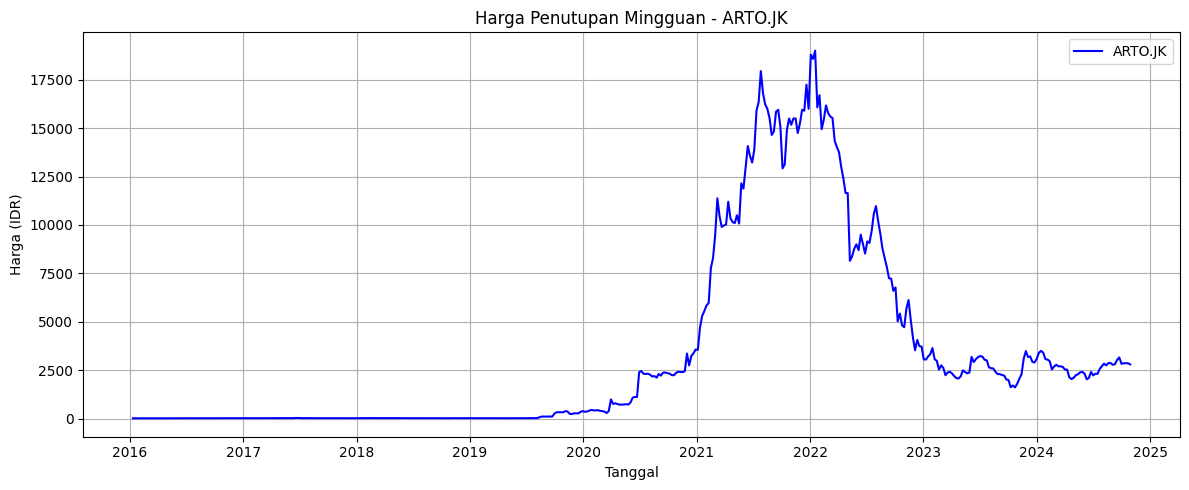

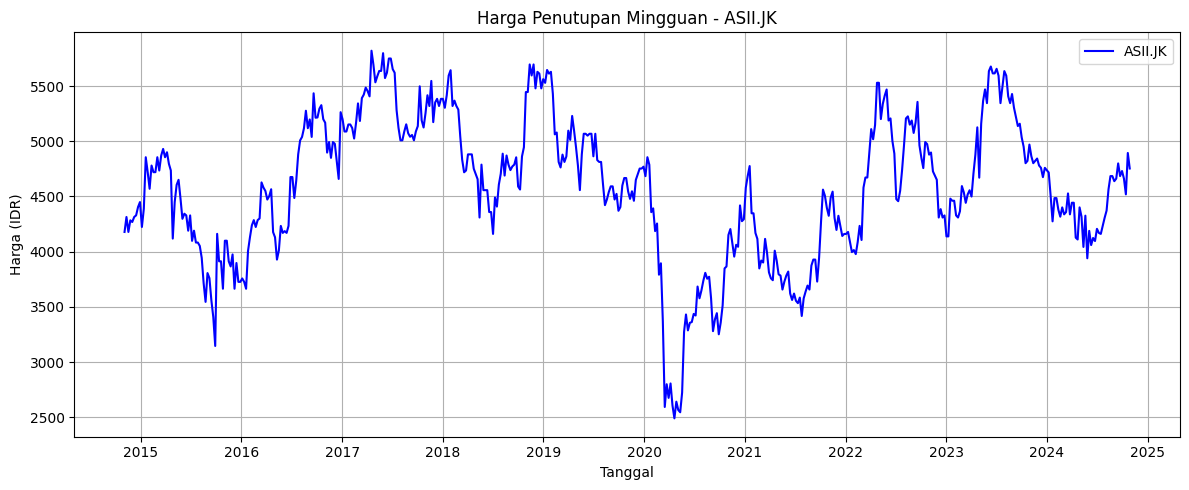

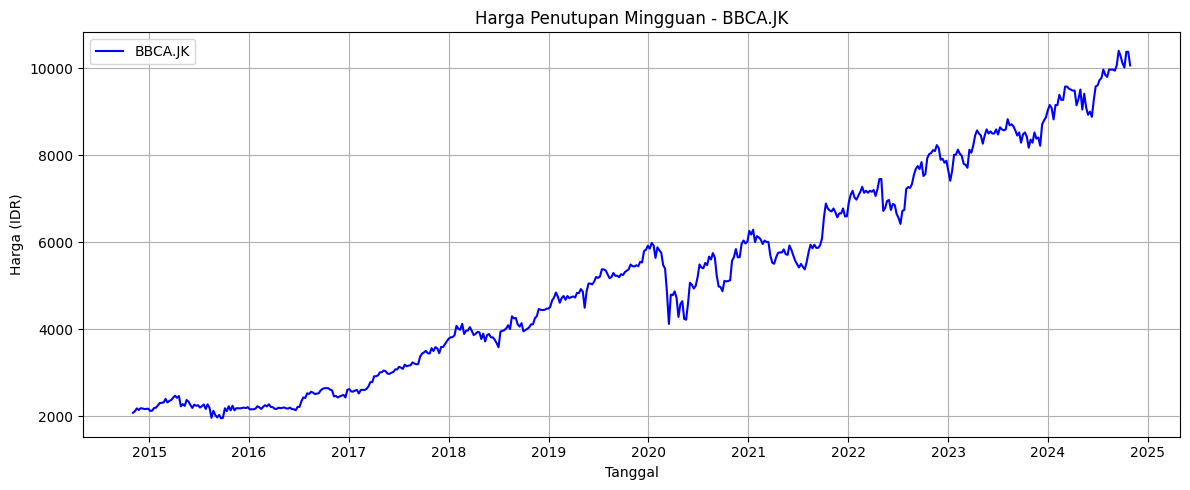

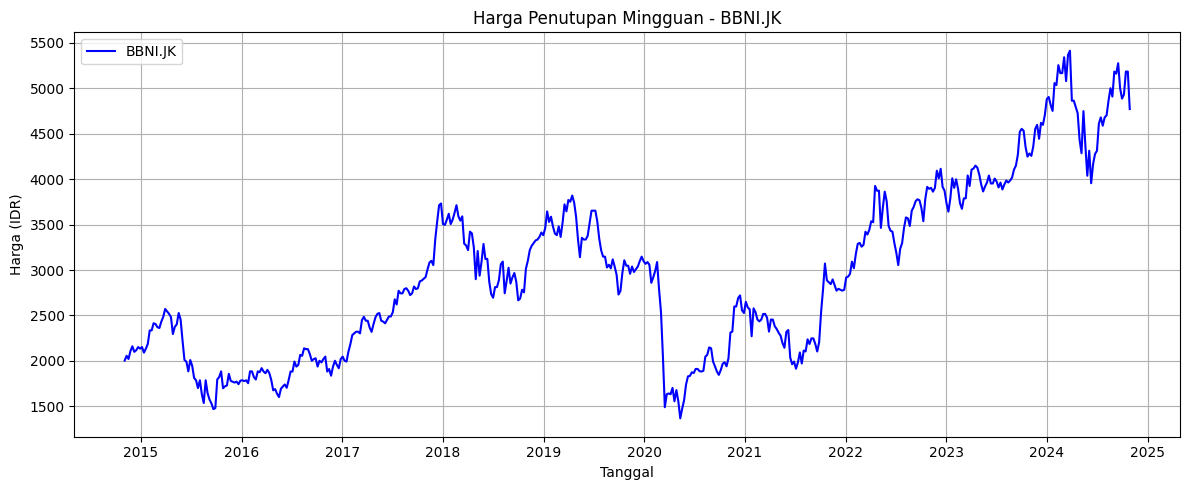

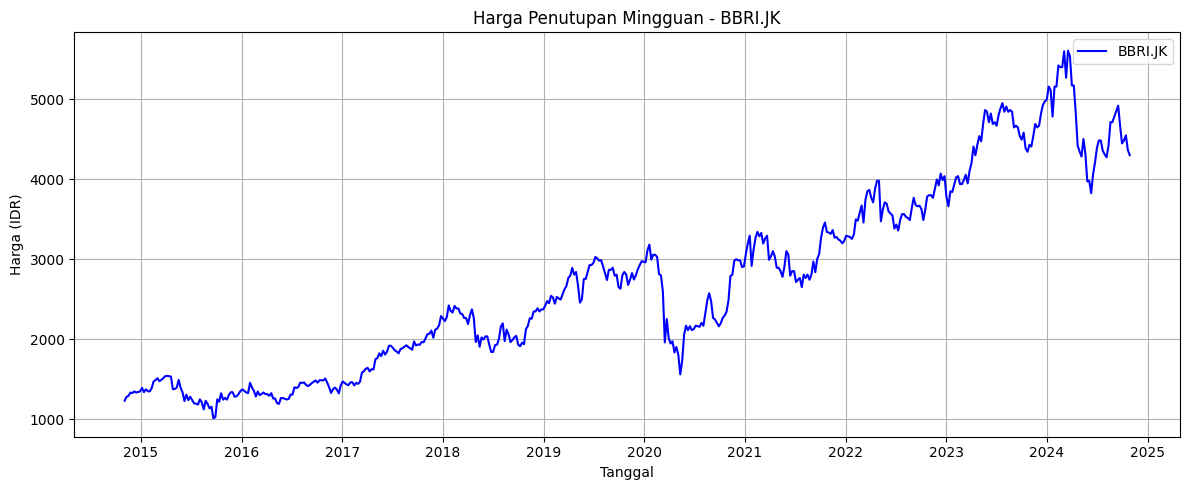

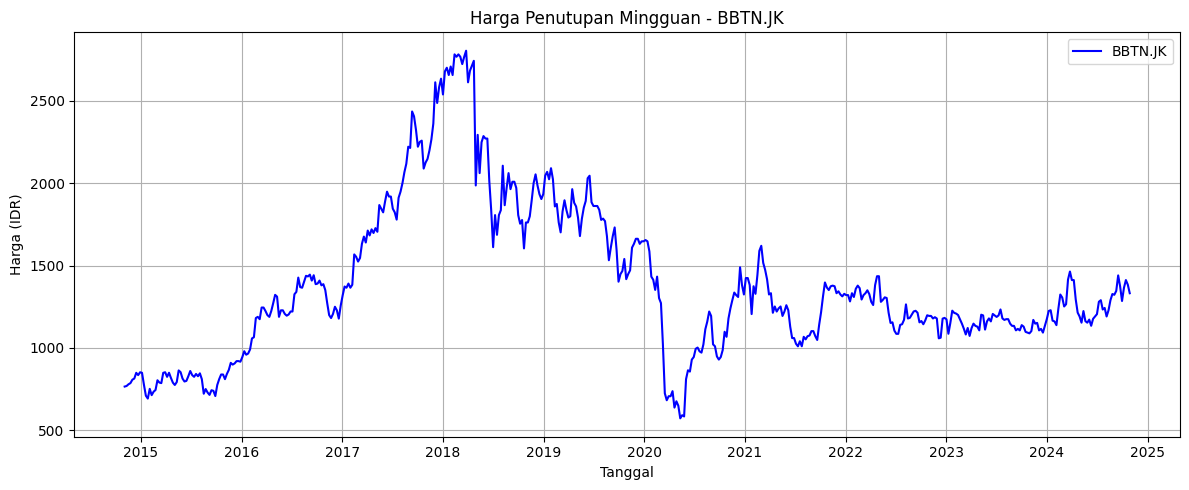

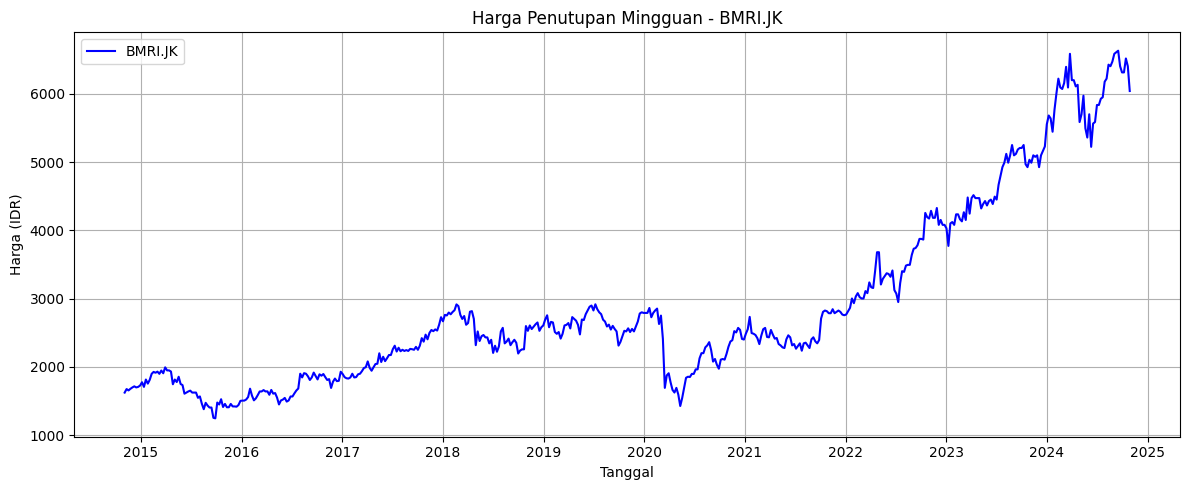

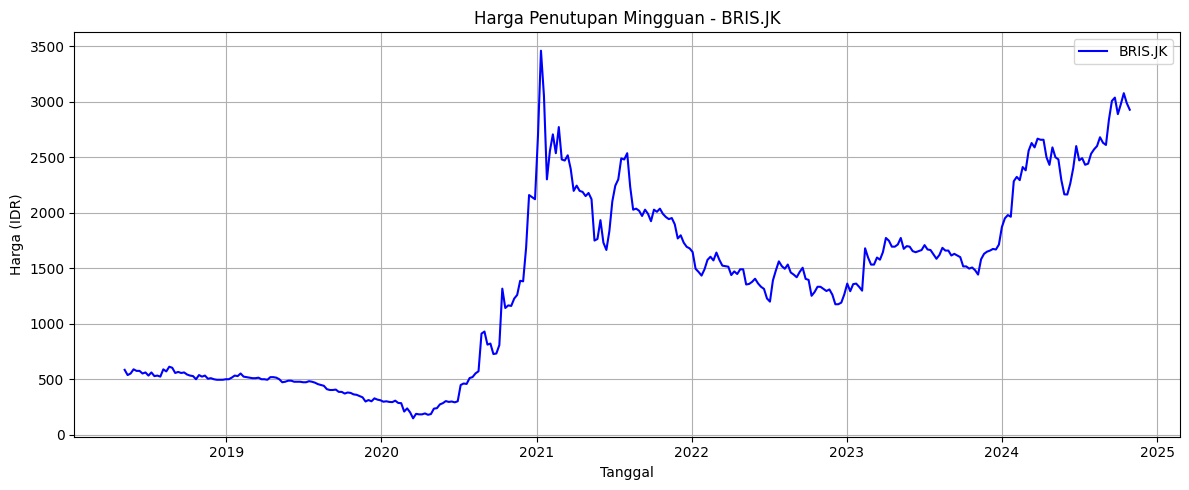

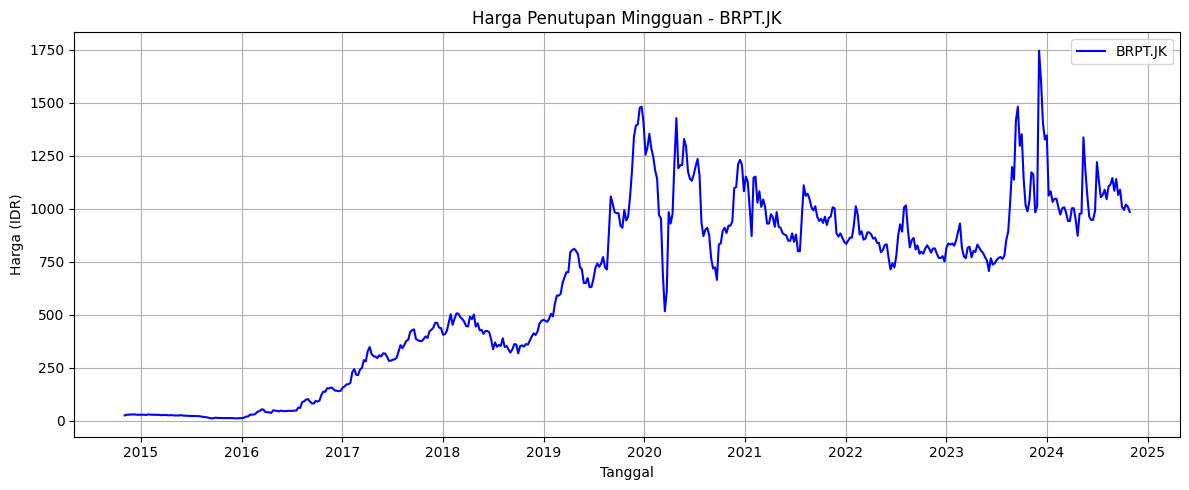

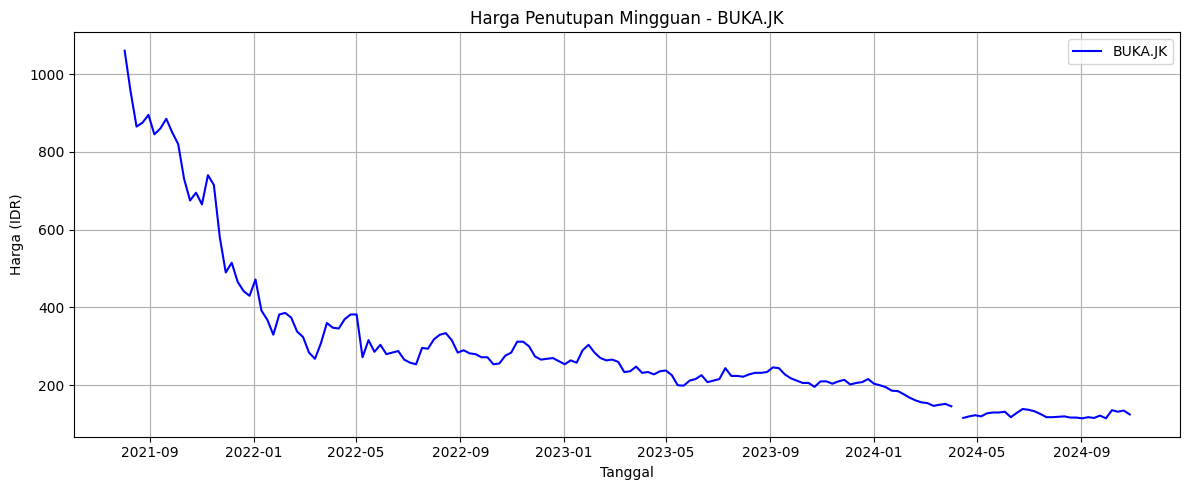

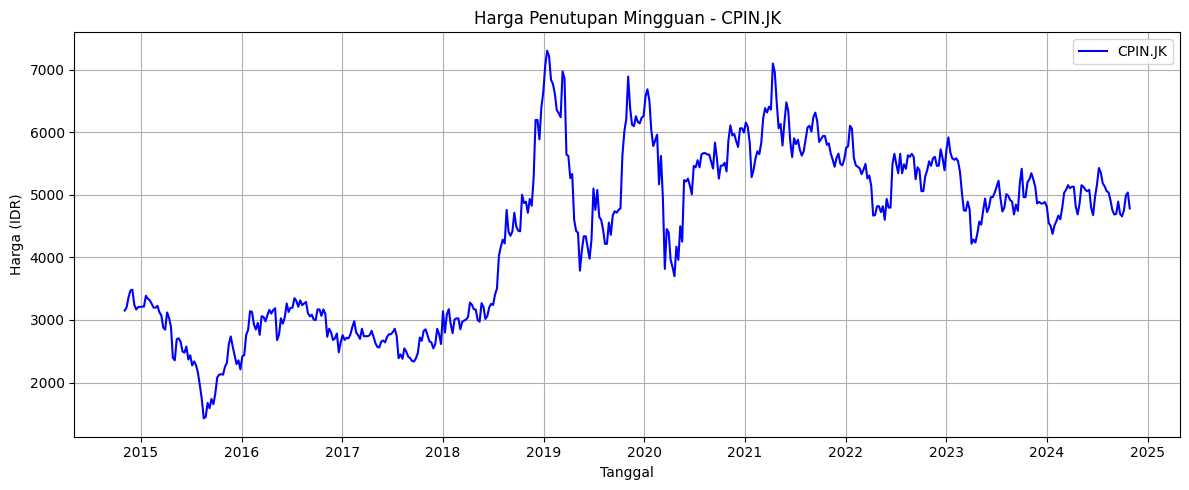

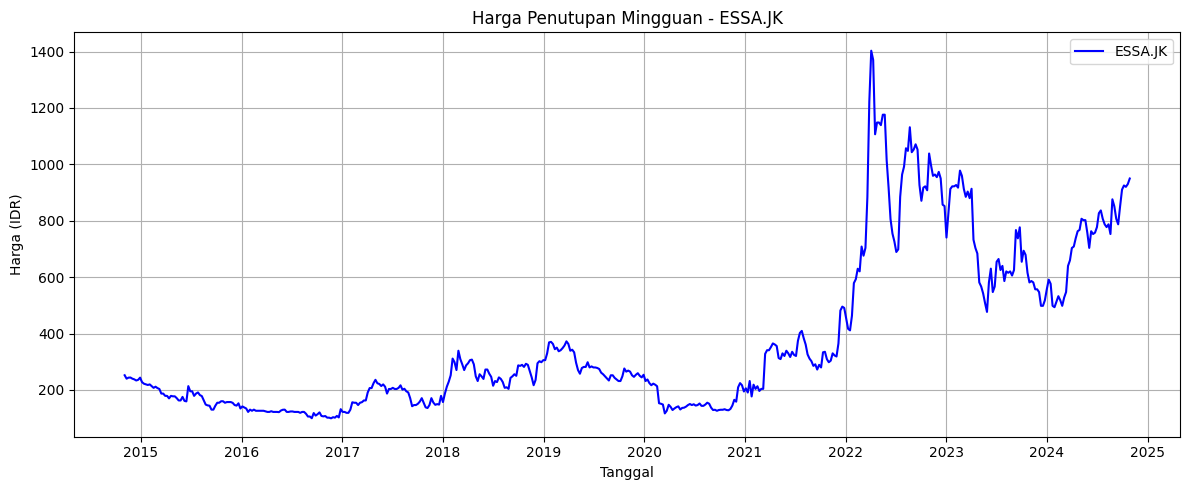

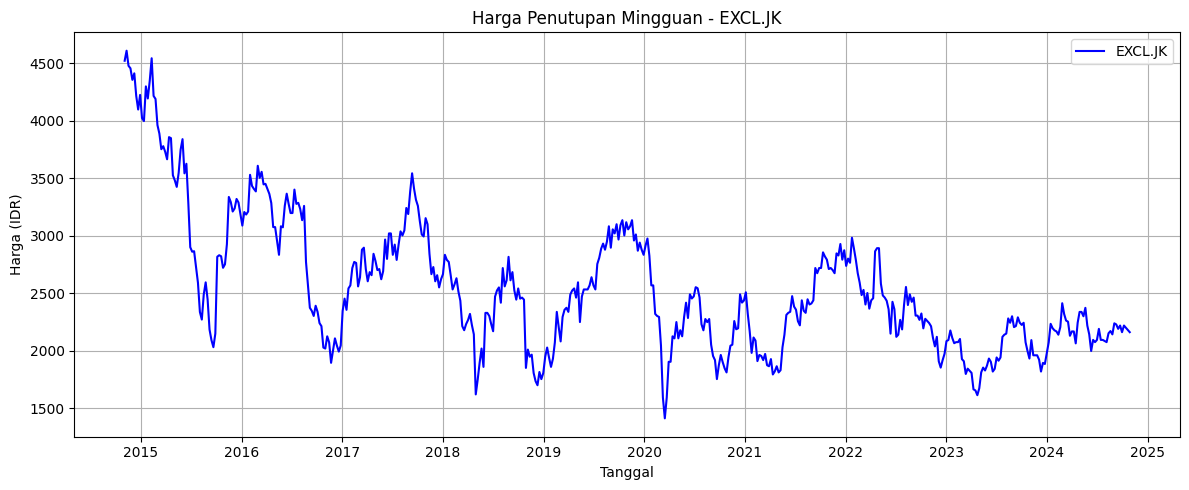

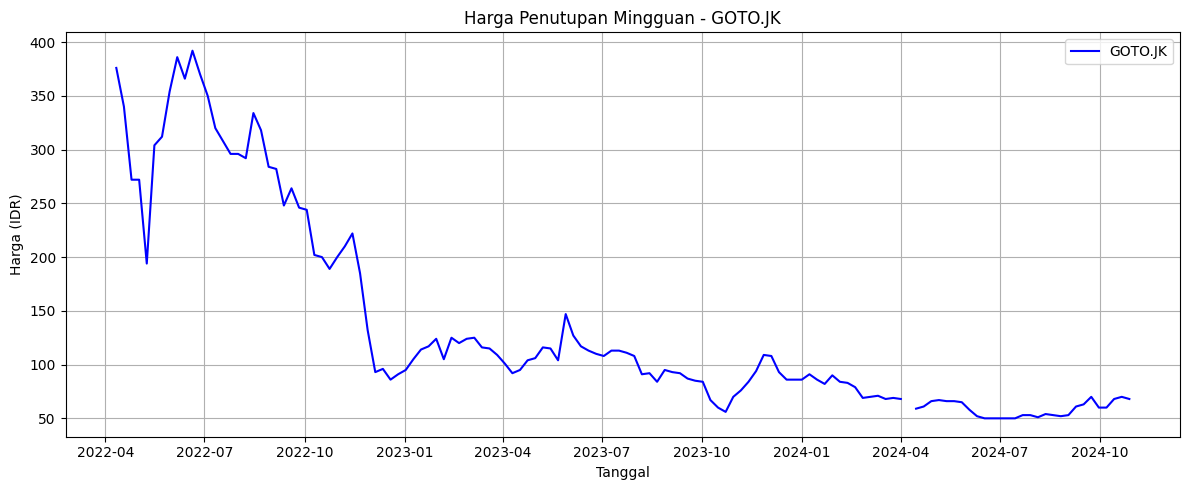

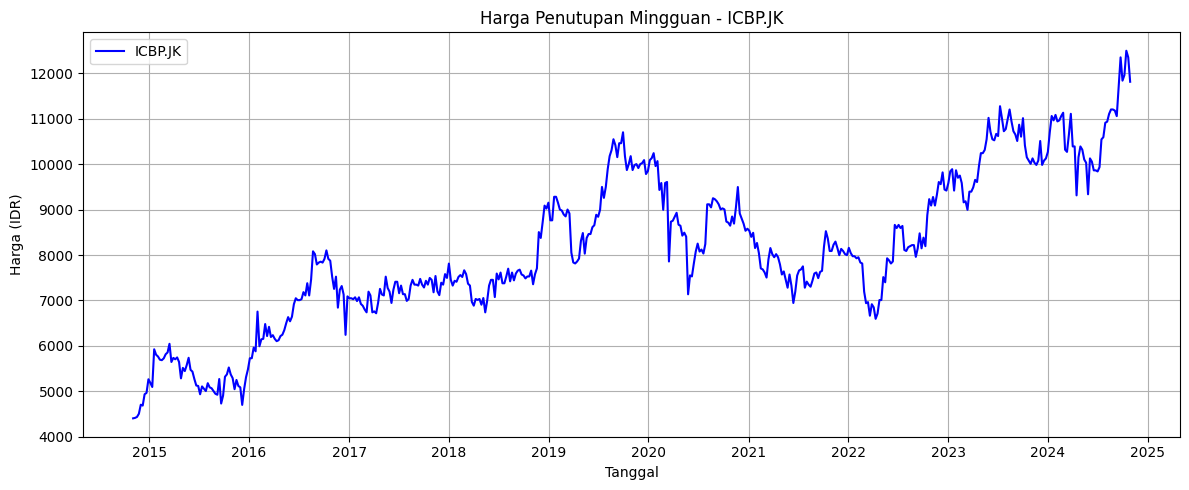

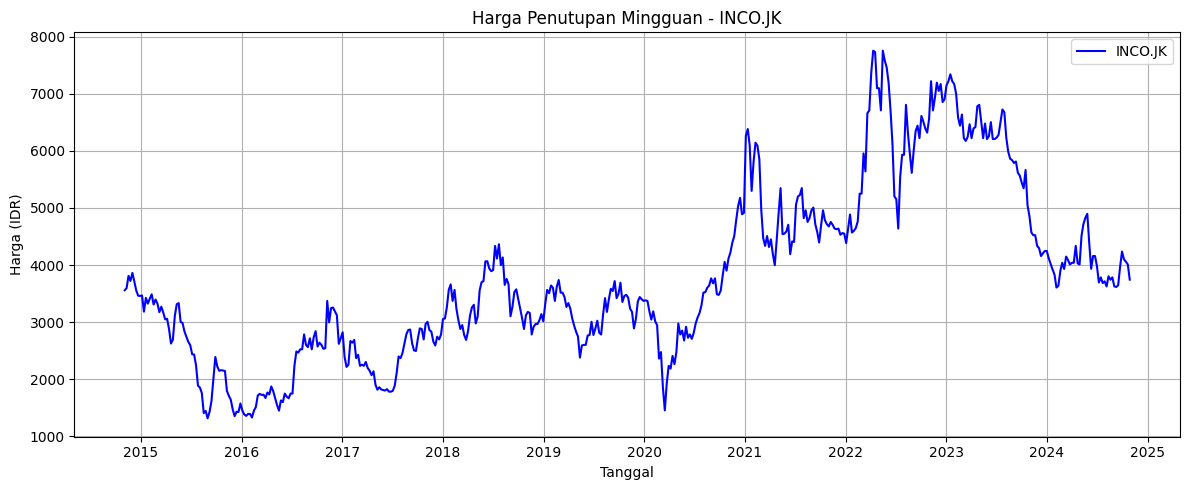

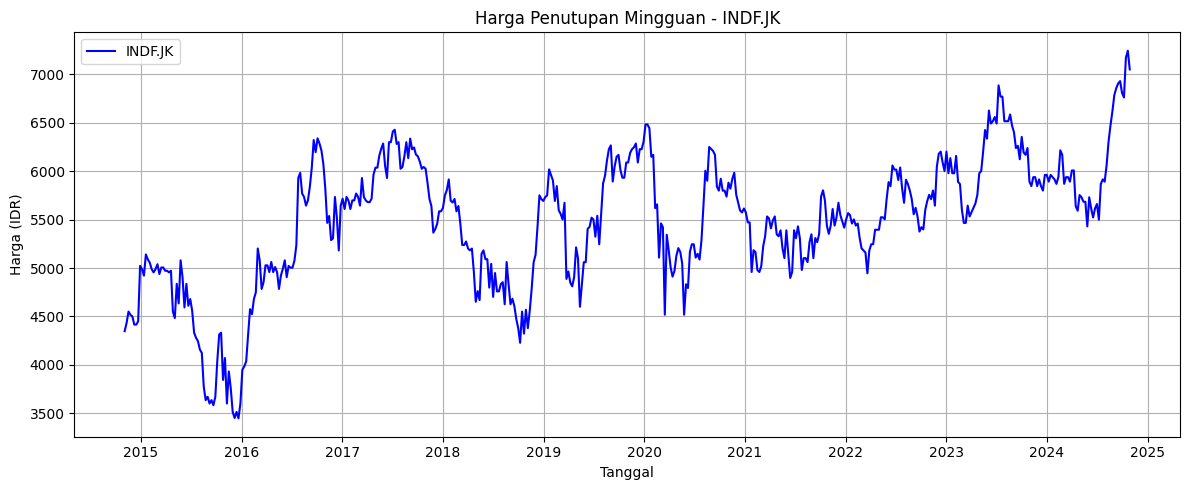

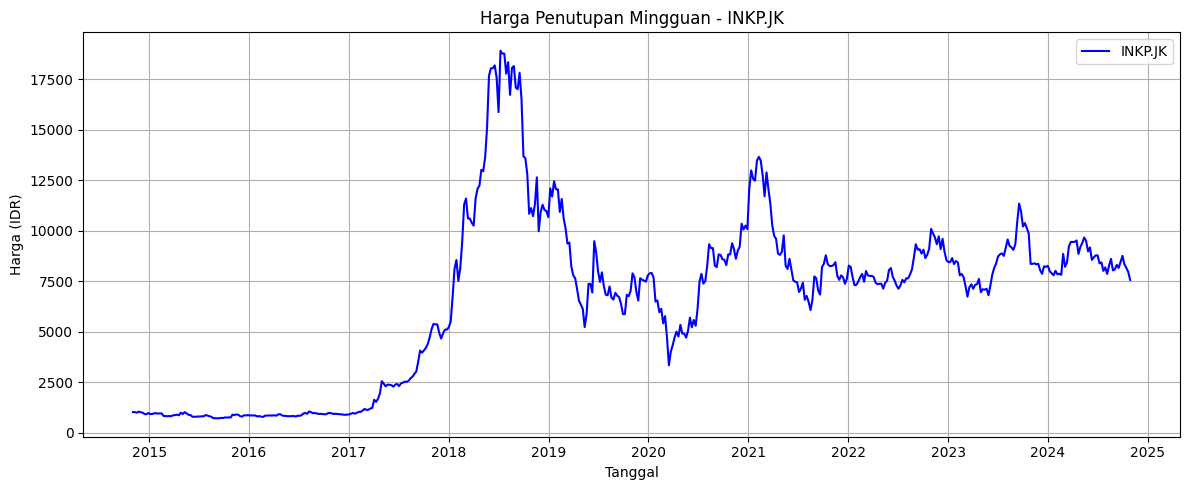

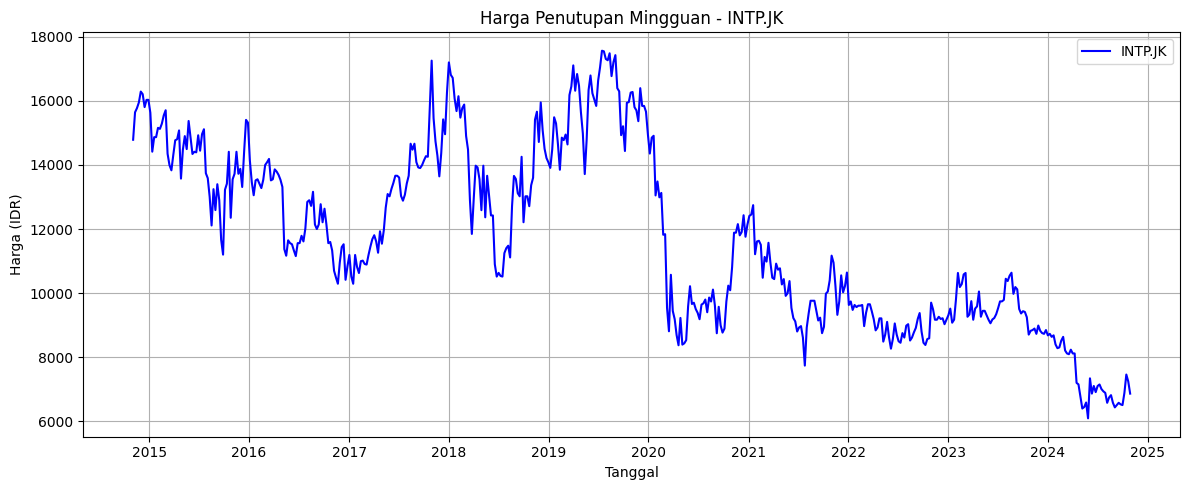

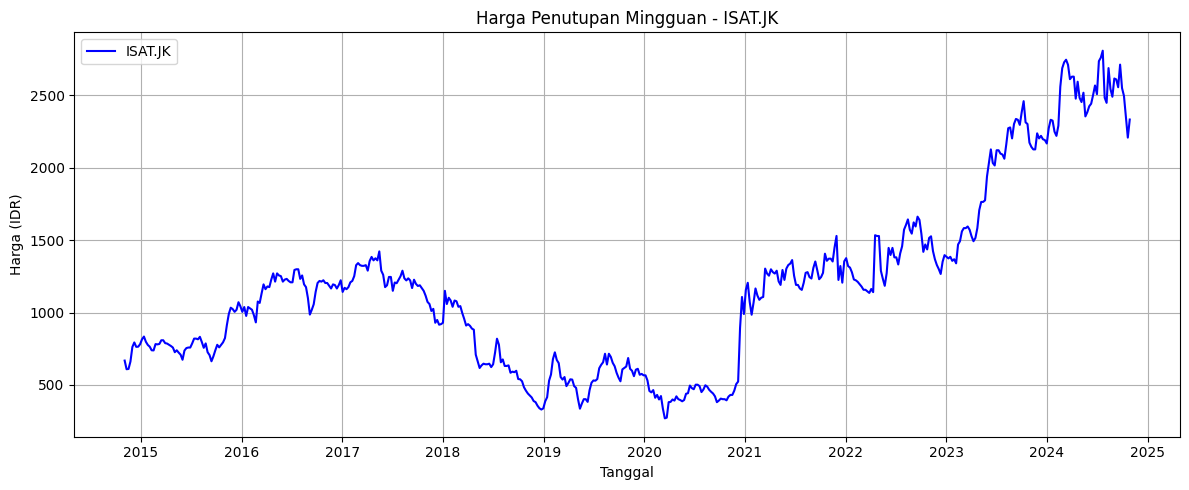

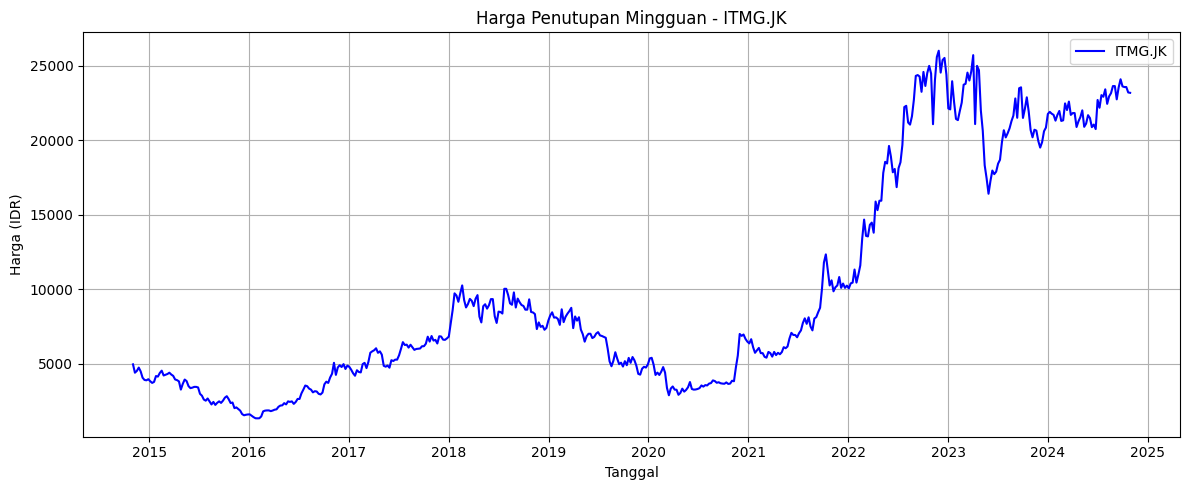

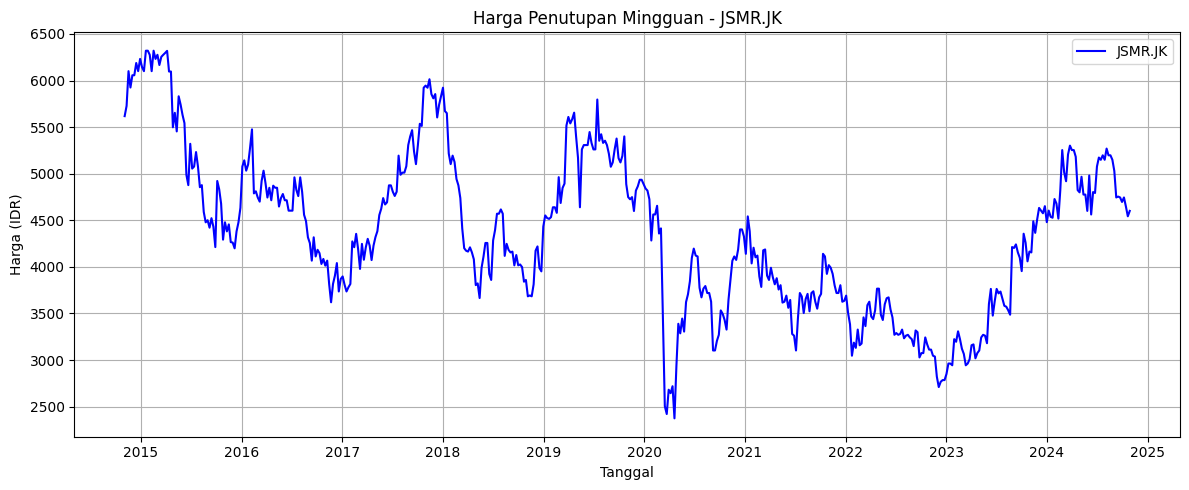

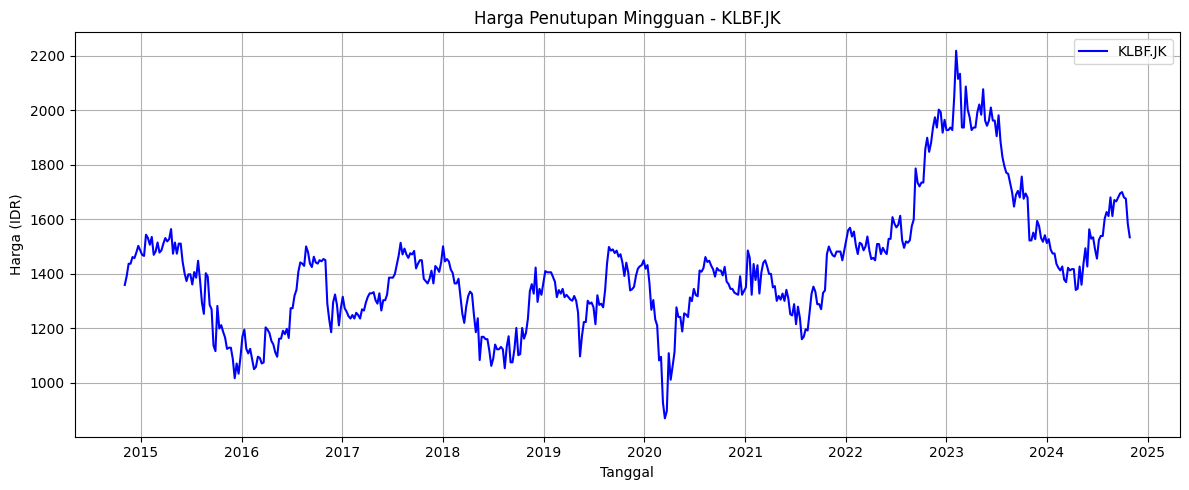

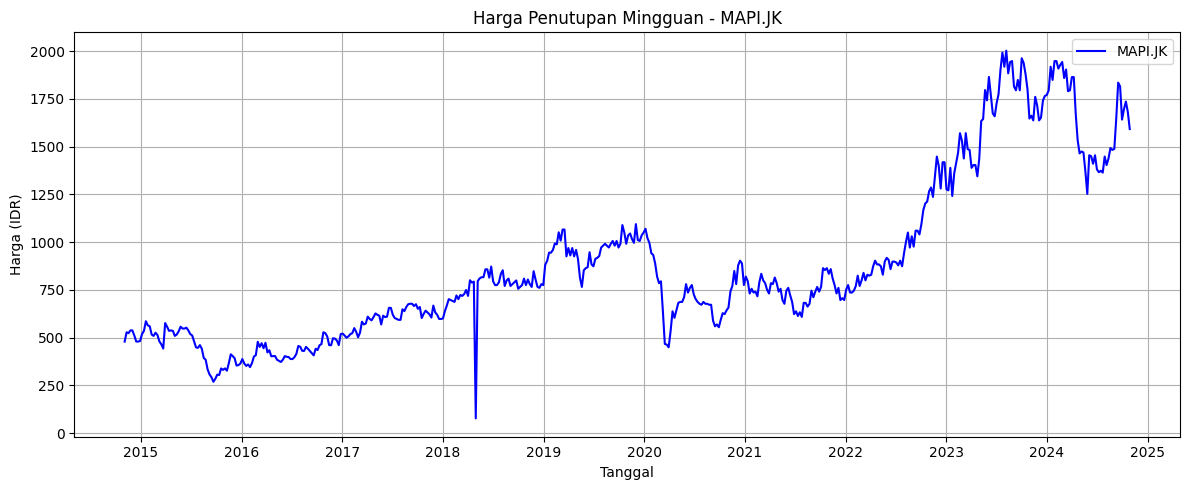

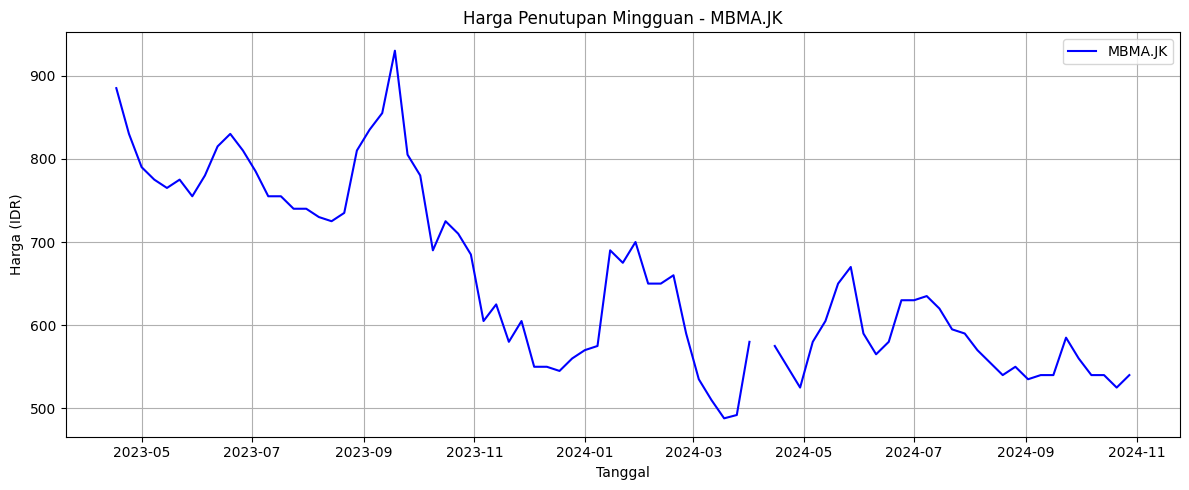

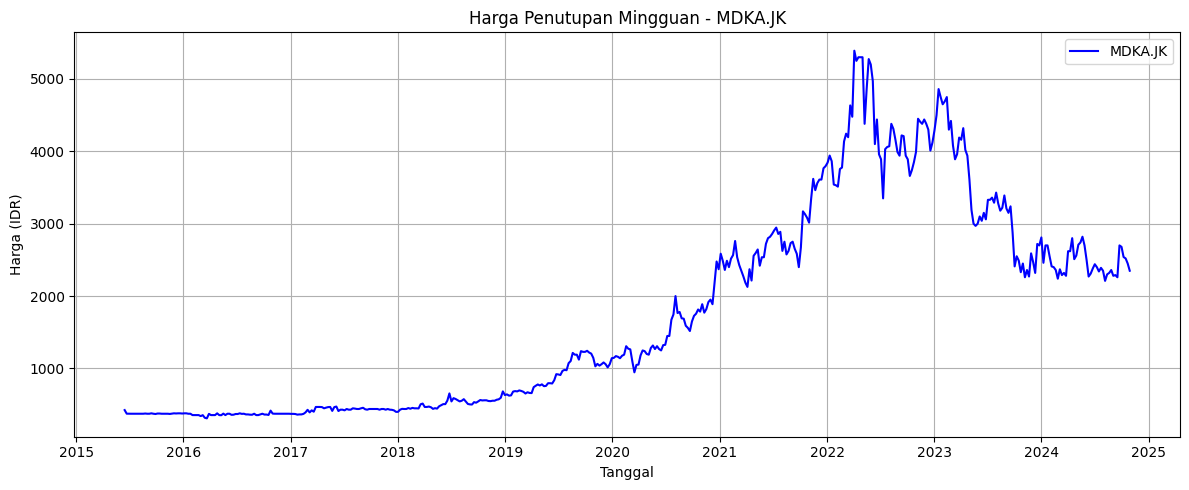

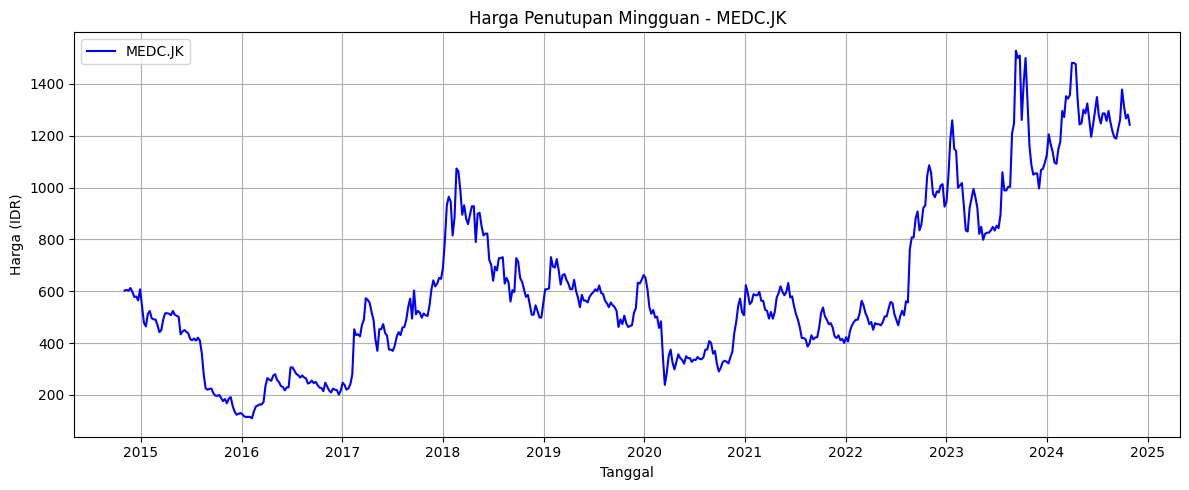

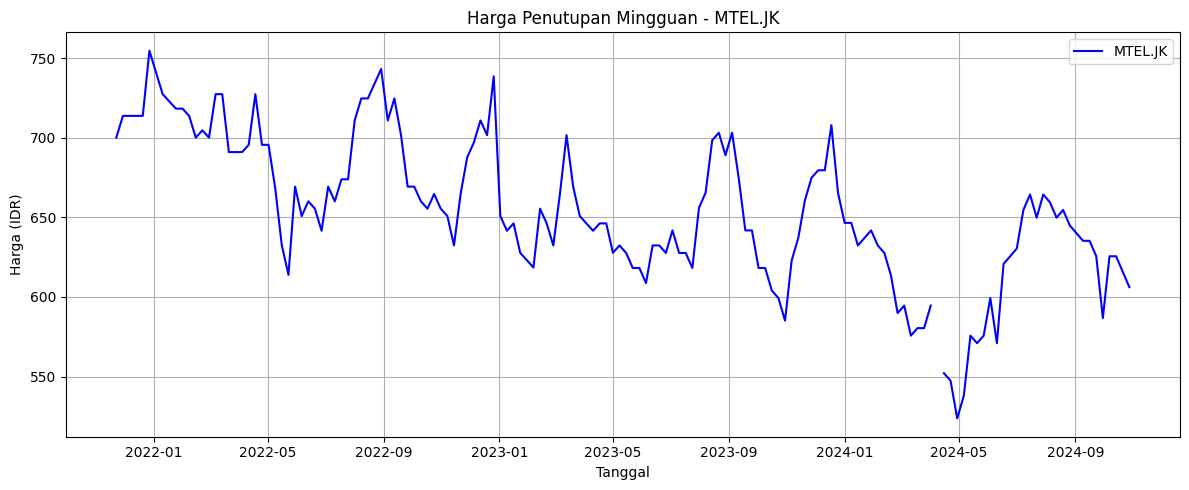

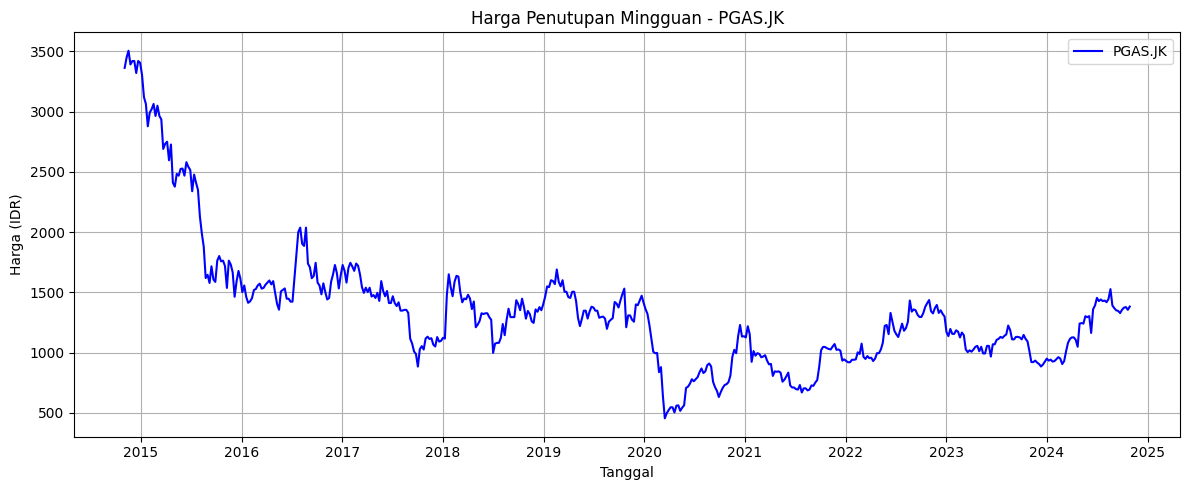

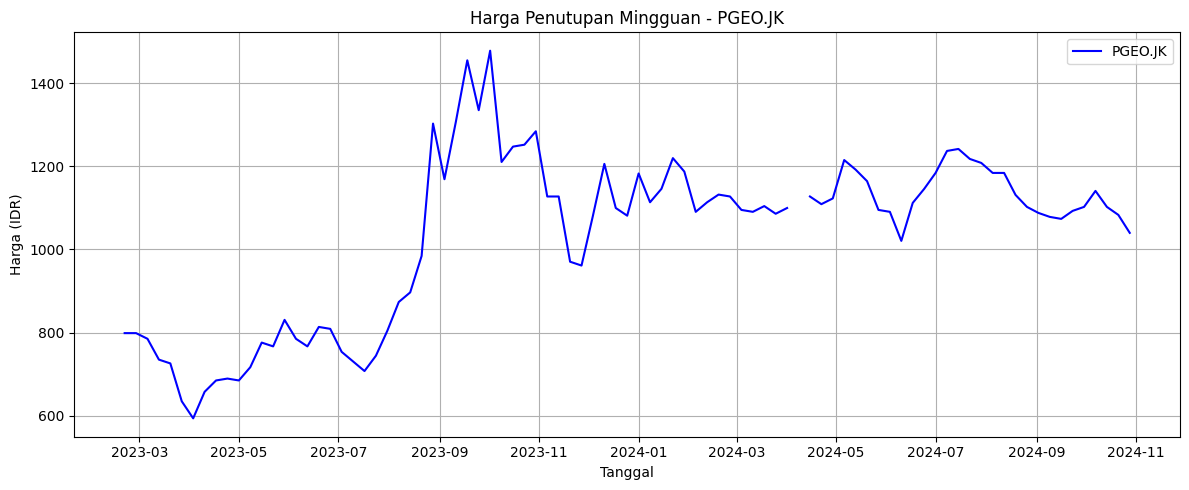

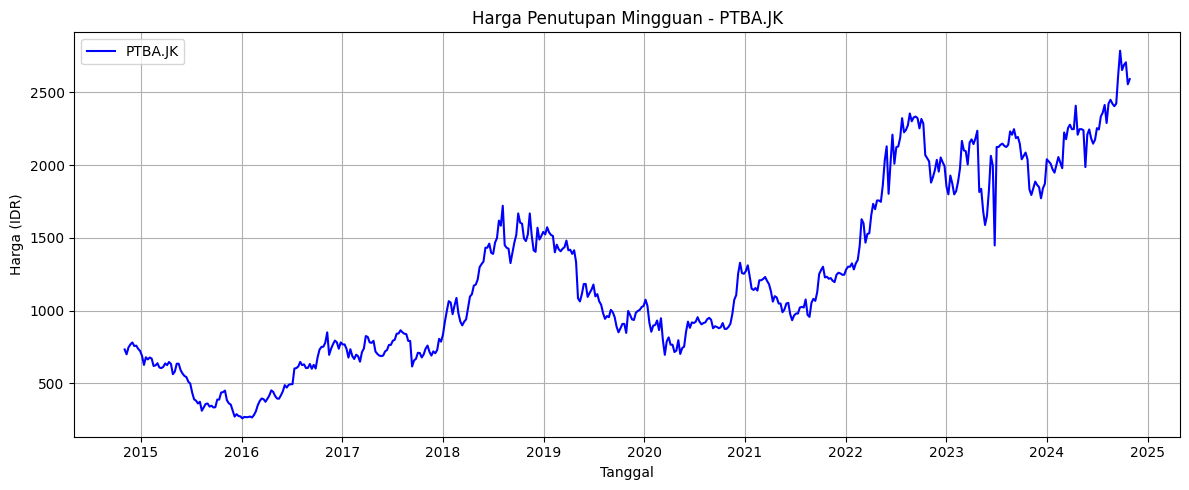

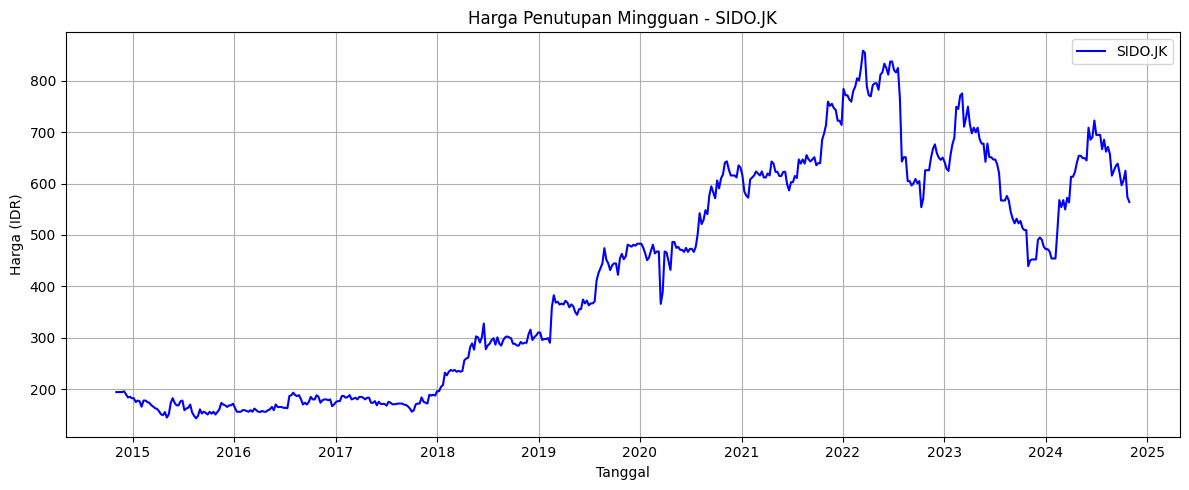

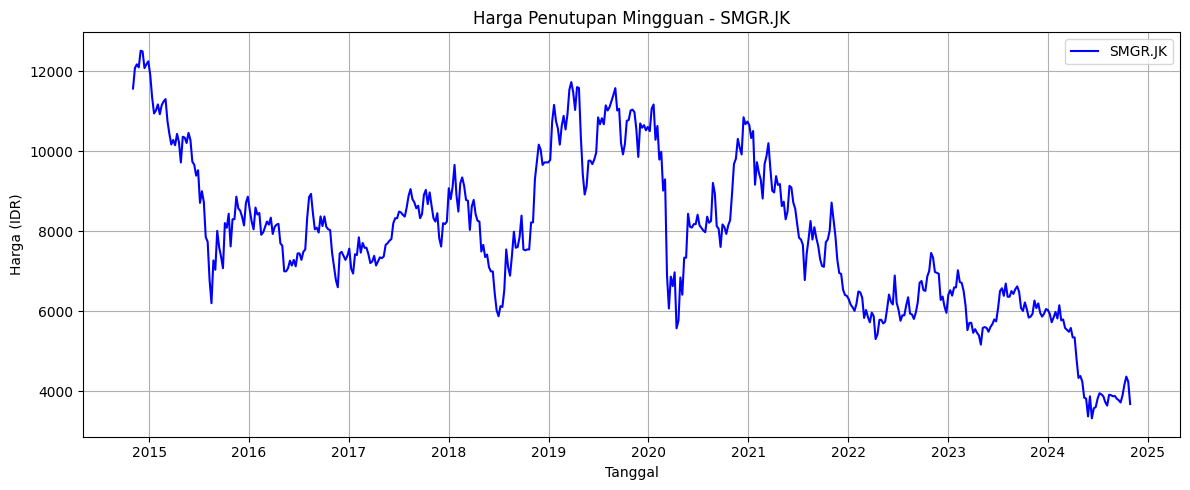

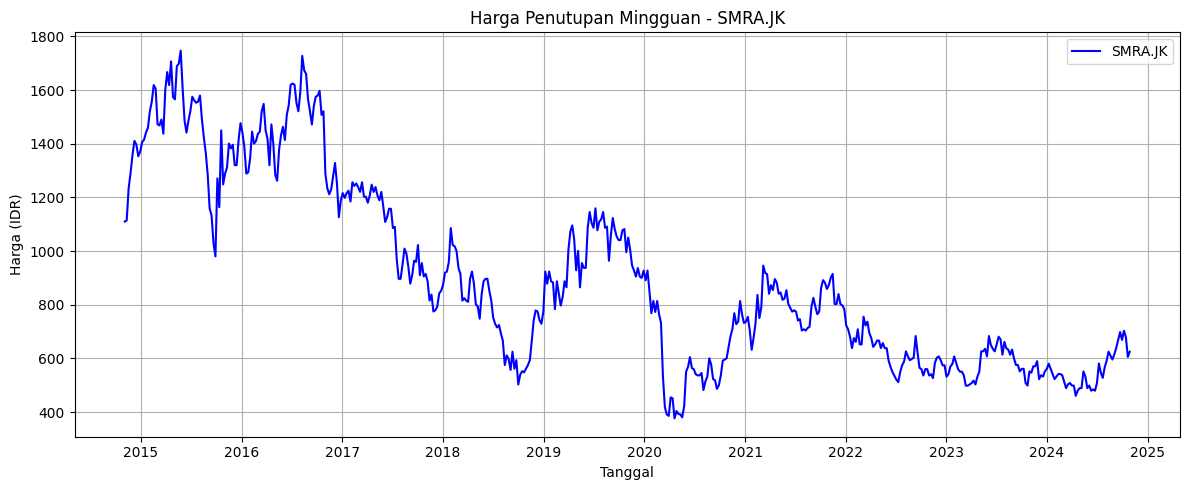

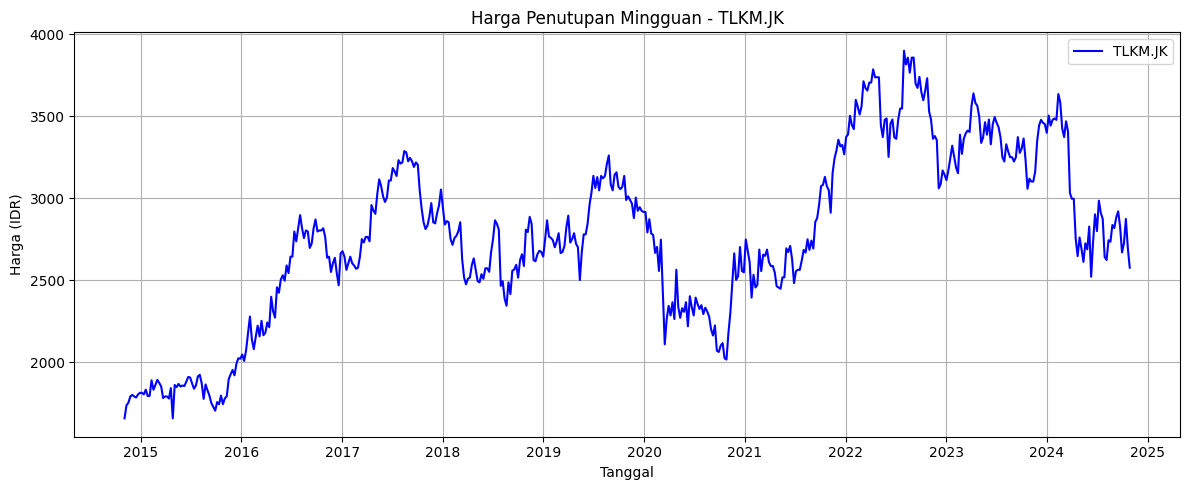

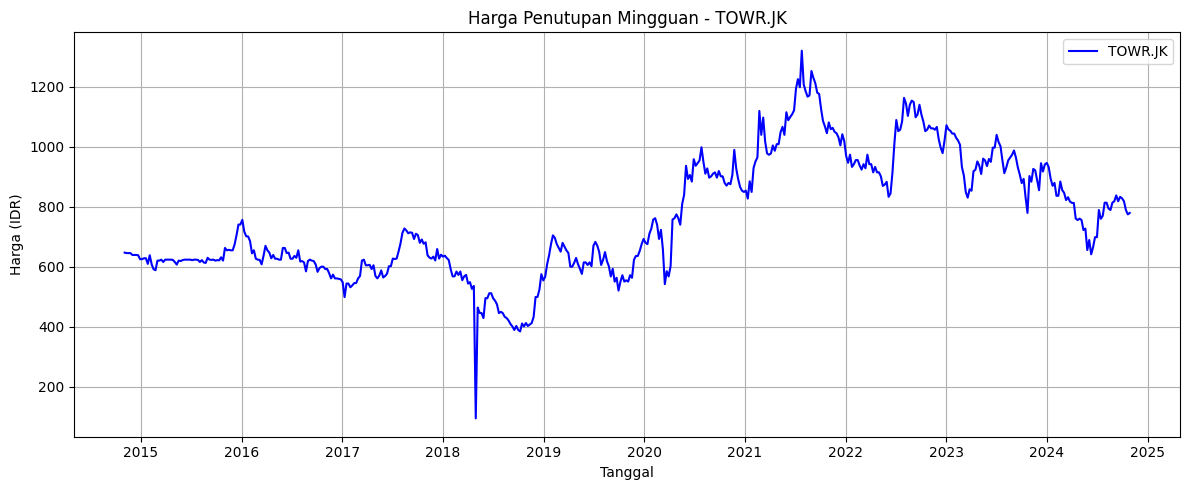

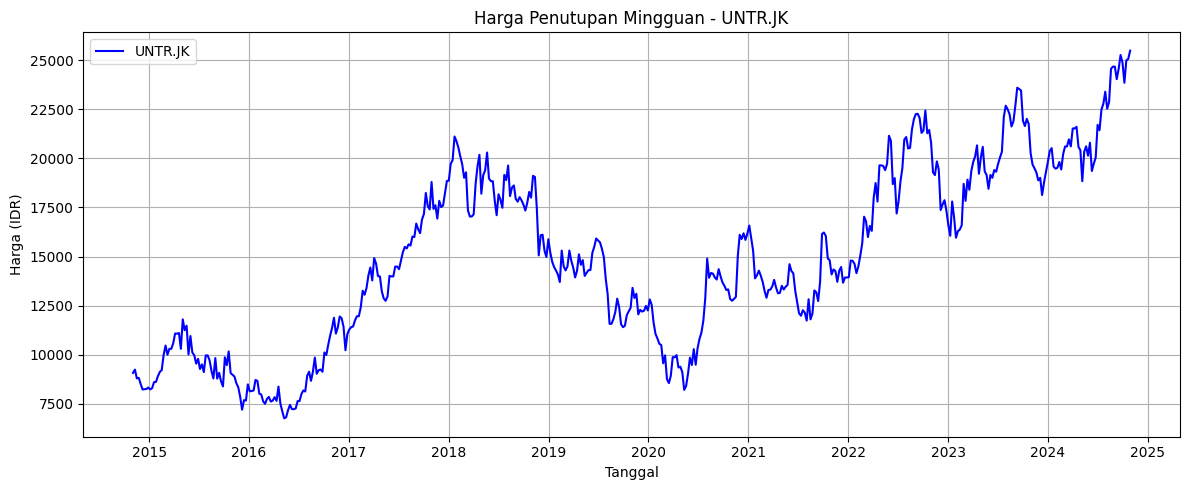

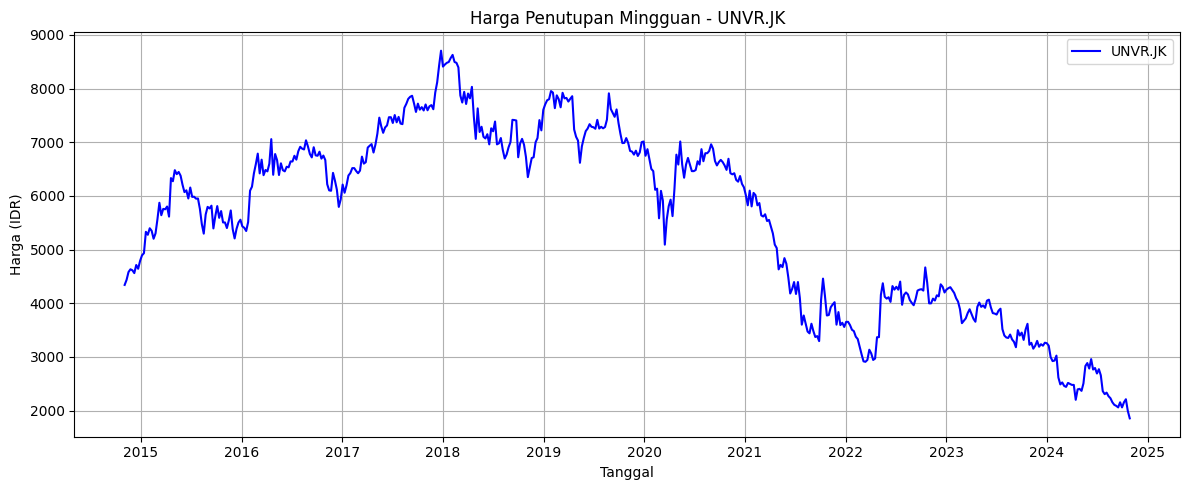

In [ ]:
# ===== Tampilkan grafik satu per satu untuk tiap saham =====
for ticker in data.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data[ticker], label=ticker, color='blue')
    plt.title(f"Harga Penutupan Mingguan - {ticker}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga (IDR)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# **Normalisasi Data**

In [ ]:
# Simpan daftar ticker sebelum pembersihan
original_tickers = data.columns.tolist()

# Tampilkan jumlah kolom sebelum pembersihan
print("Jumlah kolom sebelum penanganan data kosong:", len(data.columns))

# Drop kolom yang terlalu banyak data hilang
data_clean = data.dropna(axis=1, thresh=len(data))

# Tampilkan jumlah kolom setelah pembersihan
print("Jumlah kolom setelah penanganan data kosong:", len(data_clean.columns))

# Identifikasi ticker yang di-drop
remaining_tickers = data_clean.columns.tolist()
dropped_tickers = [ticker for ticker in original_tickers if ticker not in remaining_tickers]

# Tampilkan ticker yang di-drop
print("\nSaham yang di-drop karena data tidak lengkap:")
for ticker in dropped_tickers:
    print(f"- {ticker}")

# Gunakan data bersih
data = data_clean

# Membulatkan semua nilai dan ubah ke integer
data = data.round(0).astype(int)

# Simpan data ke file CSV
csv_file_path = 'stock_data_close.csv'
data.to_csv(csv_file_path)

# Tampilkan beberapa baris awal data
print("\nData Saham (Close) setelah dibulatkan:")
print(data.head())

# Tampilkan tipe data untuk konfirmasi integer
print("\nTipe data tiap kolom:")
print(data.dtypes)

Jumlah kolom sebelum penanganan data kosong: 45
Jumlah kolom setelah penanganan data kosong: 35

Saham yang di-drop karena data tidak lengkap:
- ADMR.JK
- AMMN.JK
- ARTO.JK
- BRIS.JK
- BUKA.JK
- GOTO.JK
- MBMA.JK
- MDKA.JK
- MTEL.JK
- PGEO.JK

Data Saham (Close) setelah dibulatkan:
Ticker      ACES.JK  ADRO.JK  AKRA.JK  AMRT.JK  ANTM.JK  ASII.JK  BBCA.JK  \
2014-11-03      577      424      581      471      633     4179     2077   
2014-11-10      584      387      570      471      633     4314     2114   
2014-11-17      599      416      564      467      664     4179     2179   
2014-11-24      591      418      566      471      664     4284     2143   
2014-12-01      580      434      551      458      654     4269     2183   

Ticker      BBNI.JK  BBRI.JK  BBTN.JK  ...  MEDC.JK  PGAS.JK  PTBA.JK  \
2014-11-03     2003     1233      765  ...      603     3362      732   
2014-11-10     2055     1282      768  ...      605     3448      699   
2014-11-17     2020     1294      7

In [ ]:
# Menambahkan ESG Score
esg_scores = {
    'ACES.JK': 19.65, 'ADRO.JK': 42.72, 'AKRA.JK': 23.79, 'AMRT.JK': 31.93, 'ANTM.JK': 42.06, 'ASII.JK': 35.6,
    'BBCA.JK': 21.51, 'BBNI.JK': 23.17, 'BBRI.JK': 17.83, 'BBTN.JK': 23.87, 'BMRI.JK': 27.64, 'BRPT.JK': 24.21,
    'CPIN.JK': 44.48, 'ESSA.JK': 49.5, 'EXCL.JK': 27.78, 'ICBP.JK': 34.8, 'INCO.JK': 29.41, 'INDF.JK': 36.06,
    'INKP.JK': 26.44, 'INTP.JK': 27.41, 'ISAT.JK': 29.59, 'ITMG.JK': 33.55, 'JSMR.JK': 10.73, 'KLBF.JK': 33.27,
    'MAPI.JK': 20.31, 'MEDC.JK': 29.08, 'PGAS.JK': 26.32, 'PTBA.JK': 33.87, 'SIDO.JK': 18.45, 'SMGR.JK': 23.05,
    'SMRA.JK': 27.81, 'TLKM.JK': 28.18, 'TOWR.JK': 23.77, 'UNTR.JK': 38.81, 'UNVR.JK': 18.21
}

# Konversi ke DataFrame
esg_df = pd.DataFrame(list(esg_scores.items()), columns=['Ticker', 'ESG_Score'])
# Mengubah data menjadi CSV
# csv_file_path = 'stock_data_esg.csv'
# esg_df.to_csv(csv_file_path)
esg_df


Ticker  ESG_Score
0   ACES.JK      19.65
1   ADRO.JK      42.72
2   AKRA.JK      23.79
3   AMRT.JK      31.93
4   ANTM.JK      42.06
5   ASII.JK      35.60
6   BBCA.JK      21.51
7   BBNI.JK      23.17
8   BBRI.JK      17.83
9   BBTN.JK      23.87
10  BMRI.JK      27.64
11  BRPT.JK      24.21
12  CPIN.JK      44.48
13  ESSA.JK      49.50
14  EXCL.JK      27.78
15  ICBP.JK      34.80
16  INCO.JK      29.41
17  INDF.JK      36.06
18  INKP.JK      26.44
19  INTP.JK      27.41
20  ISAT.JK      29.59
21  ITMG.JK      33.55
22  JSMR.JK      10.73
23  KLBF.JK      33.27
24  MAPI.JK      20.31
25  MEDC.JK      29.08
26  PGAS.JK      26.32
27  PTBA.JK      33.87
28  SIDO.JK      18.45
29  SMGR.JK      23.05
30  SMRA.JK      27.81
31  TLKM.JK      28.18
32  TOWR.JK      23.77
33  UNTR.JK      38.81
34  UNVR.JK      18.21

In [ ]:
data.describe()

Ticker      ACES.JK      ADRO.JK      AKRA.JK      AMRT.JK      ANTM.JK  \
count    522.000000   522.000000   522.000000   522.000000   522.000000   
mean     887.701149  1052.101533   783.676245  1188.212644  1034.919540   
std      314.200528   752.437360   298.157433   869.706730   587.346358   
min      340.000000   185.000000   226.000000   417.000000   238.000000   
25%      625.000000   587.750000   560.000000   542.000000   580.000000   
50%      830.000000   730.500000   743.000000   769.000000   720.000000   
75%     1173.750000  1728.000000   929.750000  1639.000000  1600.000000   
max     1516.000000  3452.000000  1600.000000  3435.000000  2574.000000   

Ticker      ASII.JK       BBCA.JK      BBNI.JK      BBRI.JK      BBTN.JK  ...  \
count    522.000000    522.000000   522.000000   522.000000   522.000000  ...   
mean    4576.273946   5212.492337  2959.639847  2714.442529  1383.486590  ...   
std      643.018458   2384.972388   948.882104  1161.630021   465.260314  ...   
min     2491.000000   1950.000000  1366.000000  1012.000000   572.000000  ...   
25%     4170.000000   2982.250000  2109.250000  1664.000000  1113.500000  ...   
50%     4608.000000   5099.000000  2870.000000  2535.500000  1264.500000  ...   
75%     5060.750000   7085.250000  3644.250000  3542.000000  1647.000000  ...   
max     5820.000000  10401.000000  5415.000000  5603.000000  2805.000000  ...   

Ticker      MEDC.JK      PGAS.JK      PTBA.JK     SIDO.JK       SMGR.JK  \
count    522.000000   522.000000   522.000000  522.000000    522.000000   
mean     614.461686  1352.881226  1219.088123  421.622605   7886.906130   
std      322.063470   533.442024   613.781057  217.423248   1932.898919   
min      110.000000   455.000000   259.000000  143.000000   3321.000000   
25%      414.000000  1020.750000   737.000000  182.250000   6433.250000   
50%      531.000000  1296.000000  1054.000000  447.000000   7854.500000   
75%      815.000000  1505.000000  1694.000000  620.000000   9106.500000   
max     1528.000000  3505.000000  2786.000000  859.000000  12508.000000   

Ticker      SMRA.JK      TLKM.JK      TOWR.JK       UNTR.JK     UNVR.JK  
count    522.000000   522.000000   522.000000    522.000000   522.00000  
mean     897.568966  2765.494253   759.603448  14909.764368  5553.41954  
std      346.600291   520.572069   200.747083   4538.393248  1711.98873  
min      376.000000  1659.000000    95.000000   6759.000000  1855.00000  
25%      598.000000  2487.000000   616.500000  11303.500000  4027.25000  
50%      814.000000  2751.500000   690.000000  14478.500000  6015.00000  
75%     1158.000000  3150.000000   928.000000  18846.750000  6914.00000  
max     1747.000000  3898.000000  1320.000000  25482.000000  8707.00000  

[8 rows x 35 columns]

# **2. Saham**

# **Return**

In [ ]:
#Mencari Return Stock
return_stock = data.pct_change()
# Menghapus kolom yang mengandung nilai NaN
return_stock_clean = return_stock.dropna()


return_stock_clean


Ticker       ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK  \
2014-11-10  0.012132 -0.087264 -0.018933  0.000000  0.000000  0.032304   
2014-11-17  0.025685  0.074935 -0.010526 -0.008493  0.048973 -0.031293   
2014-11-24 -0.013356  0.004808  0.003546  0.008565  0.000000  0.025126   
2014-12-01 -0.018613  0.038278 -0.026502 -0.027601 -0.015060 -0.003501   
2014-12-08 -0.005172 -0.085253  0.030853 -0.019651  0.004587  0.010541   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.060819 -0.025782  0.041870 -0.015516  0.037857  0.009605   
2024-10-07  0.034869  0.015760 -0.046216  0.006433  0.026153 -0.014376   
2024-10-14  0.056558 -0.023126 -0.061798  0.059764  0.038229 -0.030674   
2024-10-21 -0.026196 -0.031765 -0.023952  0.035887 -0.024548  0.082983   
2024-10-28 -0.016374  0.035593 -0.042945 -0.068996 -0.041060 -0.028811   

Ticker       BBCA.JK   BBNI.JK   BBRI.JK   BBTN.JK  ...   MEDC.JK   PGAS.JK  \
2014-11-10  0.017814  0.025961  0.039740  0.003922  ...  0.003317  0.025580   
2014-11-17  0.030747 -0.017032  0.009360  0.014323  ... -0.004959  0.016531   
2014-11-24 -0.016521  0.043564  0.030912  0.008986  ...  0.018272 -0.032525   
2014-12-01  0.018665  0.024668 -0.004498  0.026718  ... -0.024470  0.008257   
2014-12-08 -0.003665 -0.028241  0.015813  0.008674  ... -0.033445  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2024-09-30 -0.016438 -0.022991 -0.046945 -0.064774  ...  0.091918  0.020331   
2024-10-07 -0.009593  0.009413  0.008097  0.062257  ... -0.045718  0.013284   
2024-10-14  0.036146  0.051287  0.014279  0.034432  ... -0.036502  0.003642   
2024-10-21  0.000000  0.000000 -0.040255 -0.020538  ...  0.011839 -0.016691   
2024-10-28 -0.030163 -0.079637 -0.014669 -0.036876  ... -0.031201  0.019926   

Ticker       PTBA.JK   SIDO.JK   SMGR.JK   SMRA.JK   TLKM.JK   TOWR.JK  \
2014-11-10 -0.045082  0.000000  0.044106  0.003604  0.047619 -0.001546   
2014-11-17  0.068670  0.000000  0.007869  0.107720  0.009206  0.000000   
2014-11-24  0.028112  0.000000 -0.006246  0.046191  0.021665  0.000000   
2014-12-01  0.016927  0.010309  0.034403  0.051898  0.005580 -0.009288   
2014-12-08 -0.032010 -0.030612 -0.001519  0.039028 -0.005549  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.047739 -0.037097  0.046812 -0.041547 -0.055536 -0.006002   
2024-10-07  0.013570  0.015075  0.069391  0.050822  0.020599 -0.010870   
2024-10-14  0.006322  0.031353  0.048786 -0.034139  0.054679 -0.036630   
2024-10-21 -0.055802 -0.081600 -0.028643 -0.108984 -0.061239 -0.017744   
2024-10-28  0.014090 -0.017422 -0.132107  0.033058 -0.044848  0.006452   

Ticker       UNTR.JK   UNVR.JK  
2014-11-10  0.018519  0.021649  
2014-11-17 -0.048160  0.032913  
2014-11-24  0.002729  0.011131  
2014-12-01 -0.035492 -0.003885  
2014-12-08 -0.032448 -0.011484  
...              ...       ...  
2024-09-30 -0.015357 -0.044104  
2024-10-07 -0.041243  0.046139  
2024-10-14  0.047797  0.026462  
2024-10-21  0.002801 -0.098598  
2024-10-28  0.016799 -0.069242  

[521 rows x 35 columns]

In [ ]:
#Expected Return
expected_returns = return_stock.mean()
ExpectedReturns = expected_returns
expected_returns

Ticker
ACES.JK    0.002148
ADRO.JK    0.006091
AKRA.JK    0.002760
AMRT.JK    0.004735
ANTM.JK    0.003837
ASII.JK    0.001137
BBCA.JK    0.003449
BBNI.JK    0.002711
BBRI.JK    0.003247
BBTN.JK    0.002492
BMRI.JK    0.003377
BRPT.JK    0.010870
CPIN.JK    0.002272
ESSA.JK    0.005806
EXCL.JK    0.000127
ICBP.JK    0.002526
INCO.JK    0.002450
INDF.JK    0.001589
INKP.JK    0.006205
INTP.JK   -0.000218
ISAT.JK    0.004636
ITMG.JK    0.004995
JSMR.JK    0.000731
KLBF.JK    0.000988
MAPI.JK    0.019820
MEDC.JK    0.004513
PGAS.JK    0.000153
PTBA.JK    0.004263
SIDO.JK    0.002832
SMGR.JK   -0.000892
SMRA.JK    0.000833
TLKM.JK    0.001460
TOWR.JK    0.007287
UNTR.JK    0.003105
UNVR.JK   -0.000829
dtype: float64

In [ ]:
# Mengubah Return Dalam Bentuk Persen
return_stock_percent = expected_returns * 100
return_stock_percent

return_stock_percent_formatted = return_stock_percent.map("{:.2f}%".format)
return_stock_percent_formatted

Ticker
ACES.JK     0.21%
ADRO.JK     0.61%
AKRA.JK     0.28%
AMRT.JK     0.47%
ANTM.JK     0.38%
ASII.JK     0.11%
BBCA.JK     0.34%
BBNI.JK     0.27%
BBRI.JK     0.32%
BBTN.JK     0.25%
BMRI.JK     0.34%
BRPT.JK     1.09%
CPIN.JK     0.23%
ESSA.JK     0.58%
EXCL.JK     0.01%
ICBP.JK     0.25%
INCO.JK     0.25%
INDF.JK     0.16%
INKP.JK     0.62%
INTP.JK    -0.02%
ISAT.JK     0.46%
ITMG.JK     0.50%
JSMR.JK     0.07%
KLBF.JK     0.10%
MAPI.JK     1.98%
MEDC.JK     0.45%
PGAS.JK     0.02%
PTBA.JK     0.43%
SIDO.JK     0.28%
SMGR.JK    -0.09%
SMRA.JK     0.08%
TLKM.JK     0.15%
TOWR.JK     0.73%
UNTR.JK     0.31%
UNVR.JK    -0.08%
dtype: object

# **Resiko**

In [ ]:
return_stock.dropna()

Ticker       ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK  \
2014-11-10  0.012132 -0.087264 -0.018933  0.000000  0.000000  0.032304   
2014-11-17  0.025685  0.074935 -0.010526 -0.008493  0.048973 -0.031293   
2014-11-24 -0.013356  0.004808  0.003546  0.008565  0.000000  0.025126   
2014-12-01 -0.018613  0.038278 -0.026502 -0.027601 -0.015060 -0.003501   
2014-12-08 -0.005172 -0.085253  0.030853 -0.019651  0.004587  0.010541   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.060819 -0.025782  0.041870 -0.015516  0.037857  0.009605   
2024-10-07  0.034869  0.015760 -0.046216  0.006433  0.026153 -0.014376   
2024-10-14  0.056558 -0.023126 -0.061798  0.059764  0.038229 -0.030674   
2024-10-21 -0.026196 -0.031765 -0.023952  0.035887 -0.024548  0.082983   
2024-10-28 -0.016374  0.035593 -0.042945 -0.068996 -0.041060 -0.028811   

Ticker       BBCA.JK   BBNI.JK   BBRI.JK   BBTN.JK  ...   MEDC.JK   PGAS.JK  \
2014-11-10  0.017814  0.025961  0.039740  0.003922  ...  0.003317  0.025580   
2014-11-17  0.030747 -0.017032  0.009360  0.014323  ... -0.004959  0.016531   
2014-11-24 -0.016521  0.043564  0.030912  0.008986  ...  0.018272 -0.032525   
2014-12-01  0.018665  0.024668 -0.004498  0.026718  ... -0.024470  0.008257   
2014-12-08 -0.003665 -0.028241  0.015813  0.008674  ... -0.033445  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2024-09-30 -0.016438 -0.022991 -0.046945 -0.064774  ...  0.091918  0.020331   
2024-10-07 -0.009593  0.009413  0.008097  0.062257  ... -0.045718  0.013284   
2024-10-14  0.036146  0.051287  0.014279  0.034432  ... -0.036502  0.003642   
2024-10-21  0.000000  0.000000 -0.040255 -0.020538  ...  0.011839 -0.016691   
2024-10-28 -0.030163 -0.079637 -0.014669 -0.036876  ... -0.031201  0.019926   

Ticker       PTBA.JK   SIDO.JK   SMGR.JK   SMRA.JK   TLKM.JK   TOWR.JK  \
2014-11-10 -0.045082  0.000000  0.044106  0.003604  0.047619 -0.001546   
2014-11-17  0.068670  0.000000  0.007869  0.107720  0.009206  0.000000   
2014-11-24  0.028112  0.000000 -0.006246  0.046191  0.021665  0.000000   
2014-12-01  0.016927  0.010309  0.034403  0.051898  0.005580 -0.009288   
2014-12-08 -0.032010 -0.030612 -0.001519  0.039028 -0.005549  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.047739 -0.037097  0.046812 -0.041547 -0.055536 -0.006002   
2024-10-07  0.013570  0.015075  0.069391  0.050822  0.020599 -0.010870   
2024-10-14  0.006322  0.031353  0.048786 -0.034139  0.054679 -0.036630   
2024-10-21 -0.055802 -0.081600 -0.028643 -0.108984 -0.061239 -0.017744   
2024-10-28  0.014090 -0.017422 -0.132107  0.033058 -0.044848  0.006452   

Ticker       UNTR.JK   UNVR.JK  
2014-11-10  0.018519  0.021649  
2014-11-17 -0.048160  0.032913  
2014-11-24  0.002729  0.011131  
2014-12-01 -0.035492 -0.003885  
2014-12-08 -0.032448 -0.011484  
...              ...       ...  
2024-09-30 -0.015357 -0.044104  
2024-10-07 -0.041243  0.046139  
2024-10-14  0.047797  0.026462  
2024-10-21  0.002801 -0.098598  
2024-10-28  0.016799 -0.069242  

[521 rows x 35 columns]

In [ ]:
#Variansi Manual f
variansi_manual = sum((x - 0.002145) ** 2 for x in return_stock["ACES.JK"].dropna()) / (len(return_stock["ACES.JK"].dropna()) - 1)
variansi_manual

0.002924573066374173

In [ ]:
# Hitung standar deviasi manual (akar dari variansi)
std_dev_manual = variansi_manual ** 0.5
std_dev_manual


0.05407932198515596

In [ ]:
variansi_stock = return_stock.var()
variansi_stock

Ticker
ACES.JK    0.002925
ADRO.JK    0.004301
AKRA.JK    0.002602
AMRT.JK    0.002190
ANTM.JK    0.004683
ASII.JK    0.001811
BBCA.JK    0.000833
BBNI.JK    0.002060
BBRI.JK    0.001682
BBTN.JK    0.002834
BMRI.JK    0.001667
BRPT.JK    0.008663
CPIN.JK    0.002962
ESSA.JK    0.006995
EXCL.JK    0.003102
ICBP.JK    0.001258
INCO.JK    0.004798
INDF.JK    0.001326
INKP.JK    0.004872
INTP.JK    0.002515
ISAT.JK    0.004891
ITMG.JK    0.004099
JSMR.JK    0.002224
KLBF.JK    0.001525
MAPI.JK    0.167333
MEDC.JK    0.006600
PGAS.JK    0.003682
PTBA.JK    0.003700
SIDO.JK    0.001579
SMGR.JK    0.002598
SMRA.JK    0.003921
TLKM.JK    0.001227
TOWR.JK    0.031856
UNTR.JK    0.002263
UNVR.JK    0.001626
dtype: float64

In [ ]:
akar_varians = variansi_stock ** 0.5
akar_varians

Ticker
ACES.JK    0.054079
ADRO.JK    0.065582
AKRA.JK    0.051014
AMRT.JK    0.046802
ANTM.JK    0.068432
ASII.JK    0.042556
BBCA.JK    0.028865
BBNI.JK    0.045385
BBRI.JK    0.041009
BBTN.JK    0.053237
BMRI.JK    0.040827
BRPT.JK    0.093073
CPIN.JK    0.054422
ESSA.JK    0.083633
EXCL.JK    0.055692
ICBP.JK    0.035463
INCO.JK    0.069268
INDF.JK    0.036414
INKP.JK    0.069799
INTP.JK    0.050147
ISAT.JK    0.069937
ITMG.JK    0.064024
JSMR.JK    0.047159
KLBF.JK    0.039053
MAPI.JK    0.409064
MEDC.JK    0.081242
PGAS.JK    0.060683
PTBA.JK    0.060829
SIDO.JK    0.039736
SMGR.JK    0.050967
SMRA.JK    0.062620
TLKM.JK    0.035033
TOWR.JK    0.178484
UNTR.JK    0.047567
UNVR.JK    0.040329
dtype: float64

In [ ]:
#Resiko
risk_stock = return_stock.dropna().std()
risk_stock

Ticker
ACES.JK    0.054079
ADRO.JK    0.065582
AKRA.JK    0.051014
AMRT.JK    0.046802
ANTM.JK    0.068432
ASII.JK    0.042556
BBCA.JK    0.028865
BBNI.JK    0.045385
BBRI.JK    0.041009
BBTN.JK    0.053237
BMRI.JK    0.040827
BRPT.JK    0.093073
CPIN.JK    0.054422
ESSA.JK    0.083633
EXCL.JK    0.055692
ICBP.JK    0.035463
INCO.JK    0.069268
INDF.JK    0.036414
INKP.JK    0.069799
INTP.JK    0.050147
ISAT.JK    0.069937
ITMG.JK    0.064024
JSMR.JK    0.047159
KLBF.JK    0.039053
MAPI.JK    0.409064
MEDC.JK    0.081242
PGAS.JK    0.060683
PTBA.JK    0.060829
SIDO.JK    0.039736
SMGR.JK    0.050967
SMRA.JK    0.062620
TLKM.JK    0.035033
TOWR.JK    0.178484
UNTR.JK    0.047567
UNVR.JK    0.040329
dtype: float64

In [ ]:
# Convert standard deviation to percentage format
risk_stock_percent = risk_stock * 100
risk_stock_percent
# Format with percentage sign for display
risk_stock_percent_formatted = risk_stock_percent.map("{:.2f}%".format)
risk_stock_percent_formatted

Ticker
ACES.JK     5.41%
ADRO.JK     6.56%
AKRA.JK     5.10%
AMRT.JK     4.68%
ANTM.JK     6.84%
ASII.JK     4.26%
BBCA.JK     2.89%
BBNI.JK     4.54%
BBRI.JK     4.10%
BBTN.JK     5.32%
BMRI.JK     4.08%
BRPT.JK     9.31%
CPIN.JK     5.44%
ESSA.JK     8.36%
EXCL.JK     5.57%
ICBP.JK     3.55%
INCO.JK     6.93%
INDF.JK     3.64%
INKP.JK     6.98%
INTP.JK     5.01%
ISAT.JK     6.99%
ITMG.JK     6.40%
JSMR.JK     4.72%
KLBF.JK     3.91%
MAPI.JK    40.91%
MEDC.JK     8.12%
PGAS.JK     6.07%
PTBA.JK     6.08%
SIDO.JK     3.97%
SMGR.JK     5.10%
SMRA.JK     6.26%
TLKM.JK     3.50%
TOWR.JK    17.85%
UNTR.JK     4.76%
UNVR.JK     4.03%
dtype: object

# **Covarian**

In [ ]:
cov_manual = sum((return_stock["AKRA.JK"].dropna() - expected_returns['AKRA.JK']) * (return_stock["ADRO.JK"].dropna() - expected_returns['ADRO.JK'])) / (521 - 1)


cov_pandas = return_stock.cov().iloc[0, 1]

print(f"Kovarian Manual: {cov_manual}")
print(f"Kovarian dari Pandas .cov(): {cov_pandas}")

Kovarian Manual: 0.0010228731522794448
Kovarian dari Pandas .cov(): 0.0006471693778638797


In [ ]:
# numPeriods = len(ExcessReturns.index)
# VarCov = ExcessReturns.transpose().dot(ExcessReturns) / ( numPeriods - 1 )
# VarCov
#Covarian
cov_stock = return_stock.cov()
cov_stock

Ticker    ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK   BBCA.JK  \
Ticker                                                                          
ACES.JK  0.002925  0.000647  0.000308  0.000036  0.000501  0.000683  0.000438   
ADRO.JK  0.000647  0.004301  0.001023  0.000045  0.001305  0.000730  0.000650   
AKRA.JK  0.000308  0.001023  0.002602  0.000049  0.000958  0.000523  0.000469   
AMRT.JK  0.000036  0.000045  0.000049  0.002190  0.000152  0.000081  0.000053   
ANTM.JK  0.000501  0.001305  0.000958  0.000152  0.004683  0.000753  0.000557   
ASII.JK  0.000683  0.000730  0.000523  0.000081  0.000753  0.001811  0.000639   
BBCA.JK  0.000438  0.000650  0.000469  0.000053  0.000557  0.000639  0.000833   
BBNI.JK  0.000676  0.001024  0.000662  0.000109  0.000915  0.000890  0.000816   
BBRI.JK  0.000678  0.000927  0.000561 -0.000017  0.000793  0.000921  0.000747   
BBTN.JK  0.000637  0.000712  0.000613  0.000055  0.001084  0.000814  0.000752   
BMRI.JK  0.000552  0.000881  0.000612  0.000054  0.000673  0.000881  0.000745   
BRPT.JK  0.000565  0.000929  0.000677  0.000344  0.001126  0.000201  0.000394   
CPIN.JK  0.000738  0.000776  0.000264  0.000108  0.000767  0.000869  0.000539   
ESSA.JK  0.000374  0.001136  0.000826  0.000089  0.001120  0.000700  0.000261   
EXCL.JK  0.000799  0.000991  0.000502  0.000250  0.000632  0.000552  0.000443   
ICBP.JK  0.000295  0.000267  0.000190 -0.000008  0.000258  0.000419  0.000315   
INCO.JK  0.000514  0.001554  0.001056  0.000293  0.002803  0.000552  0.000583   
INDF.JK  0.000380  0.000451  0.000431 -0.000065  0.000497  0.000533  0.000379   
INKP.JK  0.000664  0.001020  0.000750  0.000187  0.001392  0.000891  0.000614   
INTP.JK  0.000664  0.000716  0.000509 -0.000044  0.000771  0.001024  0.000700   
ISAT.JK  0.000528  0.000580  0.000591  0.000200  0.001417  0.000421  0.000406   
ITMG.JK  0.000282  0.002272  0.000646  0.000182  0.001063  0.000461  0.000472   
JSMR.JK  0.000421  0.000772  0.000670  0.000095  0.000705  0.000765  0.000511   
KLBF.JK  0.000330  0.000578  0.000388  0.000073  0.000368  0.000560  0.000401   
MAPI.JK  0.000064  0.002422  0.001713 -0.000141  0.000220  0.000361  0.001073   
MEDC.JK  0.000414  0.001504  0.001022  0.000152  0.001900  0.000662  0.000607   
PGAS.JK  0.000455  0.001264  0.000728  0.000204  0.001656  0.000950  0.000660   
PTBA.JK  0.000466  0.002307  0.000528  0.000098  0.001414  0.000596  0.000438   
SIDO.JK  0.000344  0.000360  0.000159  0.000025  0.000340  0.000225  0.000245   
SMGR.JK  0.000625  0.000867  0.000593  0.000220  0.000808  0.000996  0.000613   
SMRA.JK  0.000808  0.000804  0.000582 -0.000203  0.001187  0.001169  0.000717   
TLKM.JK  0.000317  0.000382  0.000443  0.000225  0.000567  0.000494  0.000422   
TOWR.JK -0.000090  0.001114  0.000980  0.000089  0.000031  0.000056  0.000478   
UNTR.JK  0.000280  0.001539  0.000416 -0.000047  0.000652  0.000665  0.000334   
UNVR.JK  0.000309  0.000268  0.000211  0.000017  0.000226  0.000399  0.000284   

Ticker    BBNI.JK   BBRI.JK   BBTN.JK  ...   MEDC.JK   PGAS.JK   PTBA.JK  \
Ticker                                 ...                                 
ACES.JK  0.000676  0.000678  0.000637  ...  0.000414  0.000455  0.000466   
ADRO.JK  0.001024  0.000927  0.000712  ...  0.001504  0.001264  0.002307   
AKRA.JK  0.000662  0.000561  0.000613  ...  0.001022  0.000728  0.000528   
AMRT.JK  0.000109 -0.000017  0.000055  ...  0.000152  0.000204  0.000098   
ANTM.JK  0.000915  0.000793  0.001084  ...  0.001900  0.001656  0.001414   
ASII.JK  0.000890  0.000921  0.000814  ...  0.000662  0.000950  0.000596   
BBCA.JK  0.000816  0.000747  0.000752  ...  0.000607  0.000660  0.000438   
BBNI.JK  0.002060  0.001346  0.001443  ...  0.000901  0.001060  0.000721   
BBRI.JK  0.001346  0.001682  0.001072  ...  0.000630  0.000898  0.000672   
BBTN.JK  0.001443  0.001072  0.002834  ...  0.001399  0.001415  0.000711   
BMRI.JK  0.001330  0.001145  0.001101  ...  0.000844  0.000895  0.000638   
BRPT.JK  0.000

In [ ]:
var_stock = cov_stock.values.diagonal()
var_stock

array([0.00292457, 0.00430105, 0.00260241, 0.00219039, 0.00468298,
       0.00181104, 0.00083316, 0.00205984, 0.0016817 , 0.00283421,
       0.00166682, 0.00866252, 0.00296176, 0.00699456, 0.00310157,
       0.00125762, 0.00479808, 0.00132598, 0.00487191, 0.0025147 ,
       0.00489116, 0.00409913, 0.00222394, 0.00152511, 0.16733297,
       0.00660018, 0.00368245, 0.00370015, 0.00157892, 0.00259766,
       0.00392128, 0.00122729, 0.03185644, 0.00226267, 0.00162645])

# **3. Portofolio**

# **Return Portofolio**

In [ ]:
weights = np.array([1/35] * 35)
weights  # total harus = 1.0
portfolio_weekly_return = return_stock.dropna().dot(weights)
portfolio_weekly_return

2014-11-10    0.007709
2014-11-17    0.016646
2014-11-24    0.012498
2014-12-01    0.007390
2014-12-08   -0.012405
                ...   
2024-09-30   -0.012783
2024-10-07    0.007509
2024-10-14    0.013725
2024-10-21   -0.022044
2024-10-28   -0.025764
Length: 521, dtype: float64

<Axes: title={'center': 'Cumulative Return Portfolio'}>

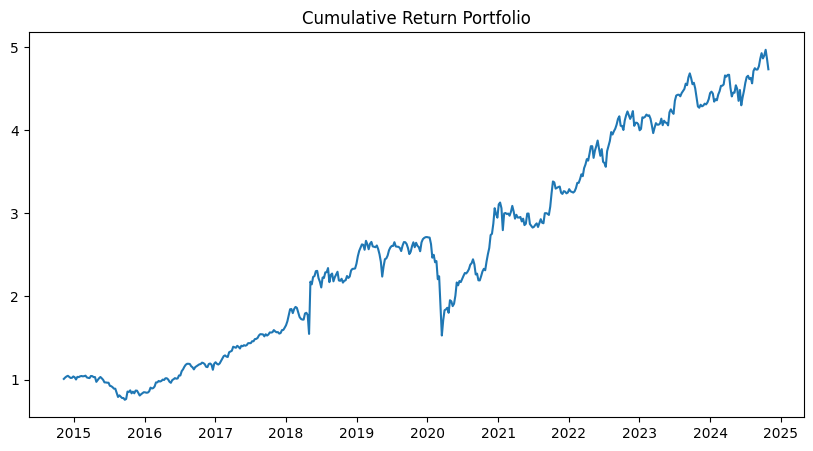

In [ ]:
cumulative_return = (1 + portfolio_weekly_return).cumprod()
average_annual_return = portfolio_weekly_return.mean() * 52
cumulative_return.plot(title="Cumulative Return Portfolio", figsize=(10, 5))

# **Resiko Portofolio**

In [ ]:
#Resiko Portofolio saham
portfolio_variance = np.dot(weights.T, np.dot(cov_stock, weights))
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

np.float64(0.03191314216765302)

# **4. Tes Fungsi Uji Metode Algoritma Komodo Mlipir**

# **Optimasi Sederhana Menggunakan Algoritma Komodo Mlipir  (50X)**

Penjelasan Parameter yang digunakan

*   n (Jumlah Individu Komodo / Ukuran Populasi): Jumlah total kandidat solusi.
*   p (Proporsi Big Males): Persentase individu terbaik yang fokus pada eksploitasi.

*   d (Mlipir Rate): Probabilitas untuk melakukan eksplorasi.
*   Kriteria Berhenti (Stopping Criterion): Kondisi untuk menghentikan algoritma.

**Min ($X_1 ^2 + X_2 ^2 + X_3 ^3$)**

**Dengan Constraint** $X_1 + X_2 + X_3 \geq 1 $



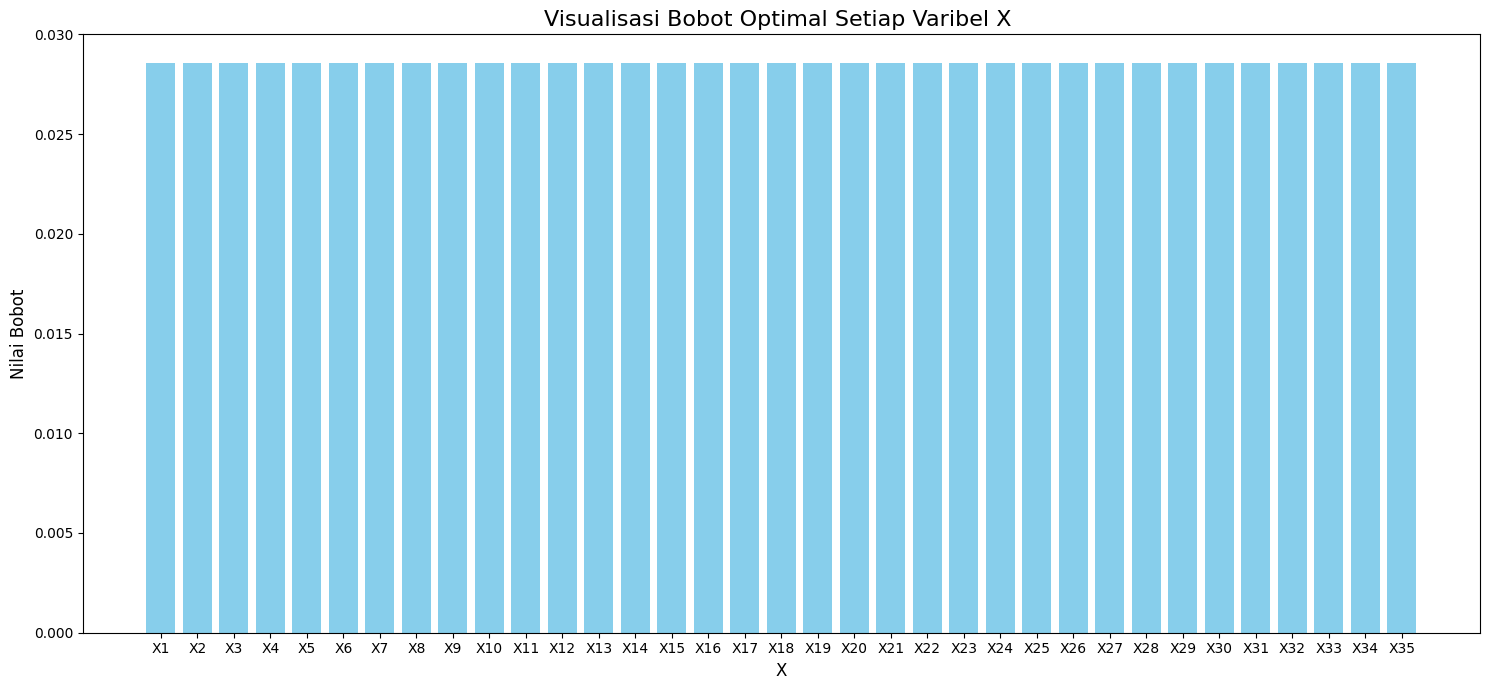

In [8]:

# 1. Membuat data persis seperti kode Anda
nilai = 1/35
daftar_variabel = [nilai for _ in range(35)]

# 2. Menyiapkan label untuk sumbu x
# Membuat label untuk setiap bar, misal: "Elemen 1", "Elemen 2", dst.
labels = [f"X{i+1}" for i in range(len(daftar_variabel))]

# 3. Membuat bar chart
# plt.figure() digunakan untuk mengatur ukuran gambar agar label tidak tumpang tindih
plt.figure(figsize=(15, 7))
plt.bar(labels, daftar_variabel, color='skyblue')

# 4. Menambahkan judul dan label pada sumbu
plt.title('Visualisasi Bobot Optimal Setiap Varibel X ', fontsize=16)
plt.ylabel('Nilai Bobot', fontsize=12)
plt.xlabel('X', fontsize=12)

# 5. Memutar label sumbu-x agar mudah dibaca
plt.xticks(rotation=0)

# 6. Menyesuaikan layout dan menyimpan gambar
plt.tight_layout()
plt.savefig('bar_chart_bobot.png')

# Untuk menampilkan plot di Colab, Anda bisa menambahkan:
# plt.show()

🚀 Optimasi dengan Algoritma Komodo MLIPIR
Tujuan: Minimasi Sum-of-Squares dengan Kendala Sum >= 1
------------------------------------------------------------

🔁 Run 1/50
Run 1 - Obj: 0.02857860 | Sum: 1.00000000 | Time: 9.1188s

🔁 Run 2/50
Run 2 - Obj: 0.02857975 | Sum: 1.00000000 | Time: 8.7991s

🔁 Run 3/50
Run 3 - Obj: 0.02858285 | Sum: 1.00000000 | Time: 9.6355s

🔁 Run 4/50
Run 4 - Obj: 0.02859072 | Sum: 1.00000000 | Time: 9.4788s

🔁 Run 5/50
Run 5 - Obj: 0.02857863 | Sum: 1.00000000 | Time: 8.3560s

🔁 Run 6/50
Run 6 - Obj: 0.02857904 | Sum: 1.00000000 | Time: 9.6886s

🔁 Run 7/50
Run 7 - Obj: 0.02858599 | Sum: 1.00000000 | Time: 9.6240s

🔁 Run 8/50
Run 8 - Obj: 0.02858126 | Sum: 1.00000000 | Time: 8.1696s

🔁 Run 9/50
Run 9 - Obj: 0.02858215 | Sum: 1.00000000 | Time: 9.9022s

🔁 Run 10/50
Run 10 - Obj: 0.02858361 | Sum: 1.00000000 | Time: 10.1277s

🔁 Run 11/50
Run 11 - Obj: 0.02857690 | Sum: 1.00000000 | Time: 8.2481s

🔁 Run 12/50
Run 12 - Obj: 0.02857630 | Sum: 1.00000000 | Time: 9.

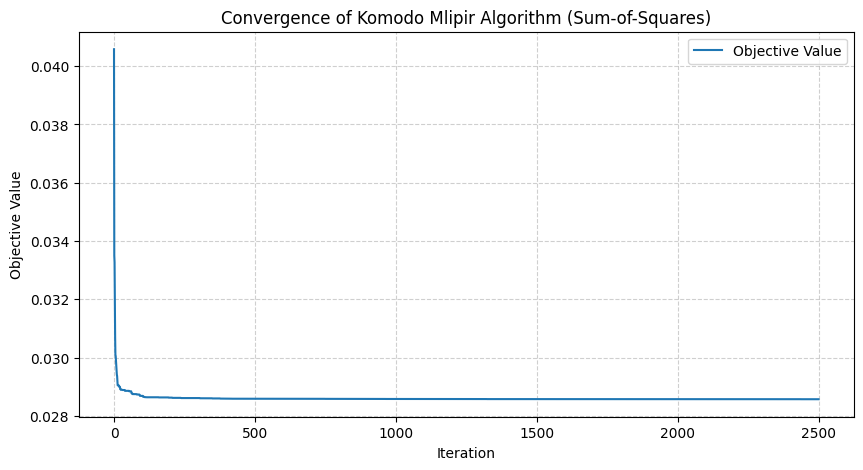

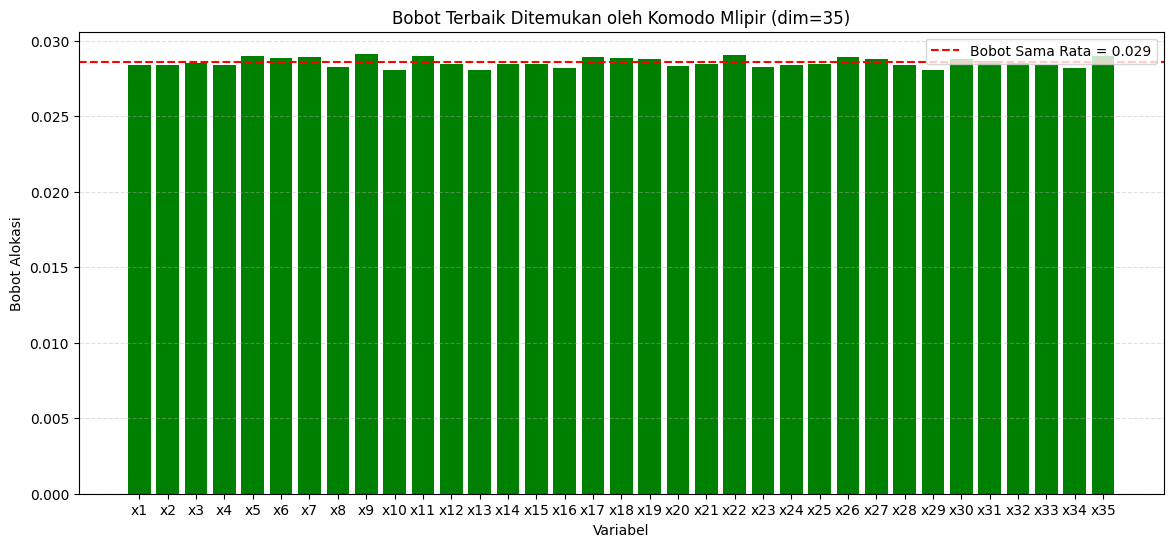


📊 ANALISIS STATISTIK HASIL EKSPERIMEN
Jumlah eksperimen : 50
Dimensi problem   : 35
Parameter (n,p,d) : (100, 0.3, 0.2)
------------------------------------------------------------
STATISTIK FITNESS:
  Rata-rata (Mean)    : 0.02858525
  Nilai terendah (Min): 0.02857476
  Nilai tertinggi (Max): 0.02875417
  Median              : 0.02857987
  Standard Deviasi    : 0.00002553
  Variansi            : 0.00000000
------------------------------------------------------------
STATISTIK WAKTU KOMPUTASI:
  Rata-rata waktu     : 9.4747 detik
  Waktu tercepat      : 8.0942 detik
  Waktu terlama       : 12.6247 detik
  Total waktu         : 473.74 detik


In [ ]:


# --- ALGORITMA KOMODO MLIPIR ----
class KomodoMlipirOptimizer:
    """
    Implementasi Algoritma Komodo Mlipir untuk optimasi portofolio.
    Tujuan: Meminimalkan jumlah kuadrat bobot (Sum of Squares) dengan kendala jumlah bobot >= 1.
    """
    def __init__(self, dim, n, p, d, max_iter, stock_names=None,
                 target_sum=1.0, penalty_coef=1000.0):
        # Parameter Problem
        self.dim = dim
        self.stock_names = stock_names or [f"x{i+1}" for i in range(dim)]
        self.target_sum = target_sum
        self.penalty_coef = penalty_coef

        # Parameter Algoritma Komodo Mlipir
        self.n = n  # Jumlah Individu Komodo (Ukuran Populasi)
        self.p = p  # Proporsi Big Males
        self.d = d  # Mlipir Rate
        self.max_iter = max_iter

        # Inisialisasi populasi
        # Menggunakan np.random.dirichlet untuk memastikan bobot awal sudah ternormalisasi (sum=1)
        self.komodos = np.random.dirichlet(np.ones(self.dim), size=self.n)
        self.fitness_values = np.array([self._fitness(k) for k in self.komodos])

        # Inisialisasi solusi terbaik global (k_best)
        best_idx = np.argmin(self.fitness_values)
        self.k_best = self.komodos[best_idx].copy()
        self.best_fitness = self.fitness_values[best_idx]

        # Riwayat untuk plot konvergensi
        self.history = []

    def _repair_solution(self, pos):
        """Memperbaiki solusi agar memenuhi batasan (non-negatif dan jumlah=1)."""
        pos = np.maximum(pos, 0)
        s = np.sum(pos)
        return pos / s if s > 0 else np.ones(self.dim) / self.dim

    def _fitness(self, w):
        """Fungsi fitness: meminimalkan jumlah kuadrat + penalti."""
        obj = np.sum(w ** 2)
        penalty = max(0, self.target_sum - np.sum(w))
        return obj + self.penalty_coef * (penalty ** 2)

    def optimize(self):
        """Loop utama dari Algoritma Komodo Mlipir."""
        for it in range(self.max_iter):
            # 1. Hitung fitness dan rangking seluruh populasi
            self.fitness_values = np.array([self._fitness(k) for k in self.komodos])
            sorted_indices = np.argsort(self.fitness_values)

            # 2. Bagi populasi menjadi Big Males, Female, dan Small Males
            q = max(1, int(round(self.n * self.p)))  # Jumlah big males

            # Pastikan populasi cukup untuk 3 kelompok
            if self.n < 3:
                print("Ukuran populasi terlalu kecil. Minimal 3.")
                break

            big_males_indices = sorted_indices[:q]
            female_index = sorted_indices[q]
            small_males_indices = sorted_indices[q+1:]

            winner_big_male = self.komodos[big_males_indices[0]]

            # 3. Update Big Males (Eksploitasi)
            # Bergerak menuju solusi terbaik global (k_best)
            for idx in big_males_indices:
                current_pos = self.komodos[idx]
                new_pos = current_pos + np.random.rand() * (self.k_best - current_pos)
                new_pos = self._repair_solution(new_pos)
                self.komodos[idx] = new_pos

            # 4. Update Female (Reproduksi: Kawin atau Partenogenesis)
            female_pos = self.komodos[female_index]
            if np.random.rand() < 0.5:  # Kawin dengan winner big male
                new_female_pos = self._repair_solution(female_pos + np.random.rand() * (winner_big_male - female_pos))
            else:  # Partenogenesis (mutasi kecil)
                mutation = (np.random.rand(self.dim) - 0.5) * 0.1 # Mutasi kecil
                new_female_pos = self._repair_solution(female_pos + mutation)
            self.komodos[female_index] = new_female_pos

            # 5. Update Small Males (Eksplorasi "Mlipir")
            for idx in small_males_indices:
                if np.random.rand() < self.d:  # Melakukan "Mlipir"
                    # Melompat ke posisi acak baru di ruang pencarian
                    new_pos = np.random.dirichlet(np.ones(self.dim))
                else: # Gerakan lokal kecil jika tidak mlipir
                    j = np.random.choice(small_males_indices)
                    new_pos = self.komodos[idx] + np.random.rand() * (self.komodos[j] - self.komodos[idx])

                self.komodos[idx] = self._repair_solution(new_pos)

            # 6. Update k_best (solusi terbaik global)
            current_best_idx = np.argmin(self.fitness_values)
            if self.fitness_values[current_best_idx] < self.best_fitness:
                self.best_fitness = self.fitness_values[current_best_idx]
                self.k_best = self.komodos[current_best_idx].copy()

            self.history.append(self.best_fitness)

        # Mengembalikan hasil optimasi terbaik
        return {
            'objective_value': np.sum(self.k_best ** 2),
            'sum_x': np.sum(self.k_best),
            'weights': self.k_best
        }

# --- FUNGSI RINGKASAN DAN VISUALISASI (Tidak ada perubahan) ---
def print_summary(optimizer, result):
    print("\n📊 Summary Optimasi Sum-of-Squares")
    print("-" * 50)
    print(f"Objective Value (Sum of Squares): {result['objective_value']:.8f}")
    print(f"Sum of Variables                : {result['sum_x']:.8f}")
    print("-" * 50)

def plot_convergence(optimizer):
    plt.figure(figsize=(10, 5))
    plt.plot(optimizer.history, label="Objective Value")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.title("Convergence of Komodo Mlipir Algorithm (Sum-of-Squares)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

def plot_weights(optimizer):
    weights = optimizer.k_best
    names = optimizer.stock_names
    plt.figure(figsize=(14, 6))
    plt.bar(names, weights, color="green")
    plt.title(f"Bobot Terbaik Ditemukan oleh Komodo Mlipir (dim={optimizer.dim})")
    plt.xlabel("Variabel")
    plt.ylabel("Bobot Alokasi")
    plt.axhline(1/optimizer.dim, color="red", linestyle="--", label=f"Bobot Sama Rata = {1/optimizer.dim:.3f}")
    plt.legend()
    plt.grid(axis="y", alpha=0.4, linestyle="--")
    plt.show()

# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    print("🚀 Optimasi dengan Algoritma Komodo MLIPIR")
    print("Tujuan: Minimasi Sum-of-Squares dengan Kendala Sum >= 1")
    print("-" * 60)

    # --- Pengaturan Parameter Eksperimen ---
    DIMENSI = 35
    JUMLAH_RUN = 50

    # --- Parameter Algoritma Komodo Mlipir ---
    N_KOMODO = 100      # n: Ukuran populasi
    P_BIG_MALES = 0.30 # p: Proporsi big males (30%)
    D_MLIPIR = 0.2     # d: Mlipir rate (20%)
    MAX_ITER = 2500

    names = [f"x{i+1}" for i in range(DIMENSI)]

    # Inisialisasi untuk menyimpan hasil dari semua run
    best_fitness_overall = float('inf')
    best_result_overall = None
    best_optimizer_overall = None
    all_best_fitness = []
    all_times = []

    for run in range(1, JUMLAH_RUN + 1):
        print(f"\n🔁 Run {run}/{JUMLAH_RUN}")

        start_time = time.time()

        # Inisialisasi dan jalankan optimizer dengan parameter Komodo Mlipir
        optimizer = KomodoMlipirOptimizer(dim=DIMENSI, stock_names=names,
                                          n=N_KOMODO, p=P_BIG_MALES, d=D_MLIPIR,
                                          max_iter=MAX_ITER)
        result = optimizer.optimize()

        end_time = time.time()
        run_time = end_time - start_time

        all_best_fitness.append(result['objective_value'])
        all_times.append(run_time)

        print(f"Run {run} - Obj: {result['objective_value']:.8f} | Sum: {result['sum_x']:.8f} | Time: {run_time:.4f}s")

        # Simpan hasil terbaik dari semua run
        if result['objective_value'] < best_fitness_overall:
            best_fitness_overall = result['objective_value']
            best_result_overall = result
            best_optimizer_overall = optimizer

    # --- Tampilkan Hasil Terbaik ---
    print("\n🏆 Best Result from All Runs 🏆")
    print_summary(best_optimizer_overall, best_result_overall)
    plot_convergence(best_optimizer_overall)
    plot_weights(best_optimizer_overall)

    # --- Analisis Statistik Lengkap dari Semua Run ---
    print("\n📊 ANALISIS STATISTIK HASIL EKSPERIMEN")
    print("=" * 60)
    print(f"Jumlah eksperimen : {JUMLAH_RUN}")
    print(f"Dimensi problem   : {DIMENSI}")
    print(f"Parameter (n,p,d) : ({N_KOMODO}, {P_BIG_MALES}, {D_MLIPIR})")
    print("-" * 60)

    print("STATISTIK FITNESS:")
    print(f"  Rata-rata (Mean)    : {np.mean(all_best_fitness):.8f}")
    print(f"  Nilai terendah (Min): {np.min(all_best_fitness):.8f}")
    print(f"  Nilai tertinggi (Max): {np.max(all_best_fitness):.8f}")
    print(f"  Median              : {np.median(all_best_fitness):.8f}")
    print(f"  Standard Deviasi    : {np.std(all_best_fitness):.8f}")
    print(f"  Variansi            : {np.var(all_best_fitness):.8f}")
    print("-" * 60)

    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"  Rata-rata waktu     : {np.mean(all_times):.4f} detik")
    print(f"  Waktu tercepat      : {np.min(all_times):.4f} detik")
    print(f"  Waktu terlama       : {np.max(all_times):.4f} detik")
    print(f"  Total waktu         : {np.sum(all_times):.2f} detik")
    print("=" * 60)

# **5. Implementasi Algoritma Komodo Mlipir dalam Optimasi Portofolio**

# **Tanpa ESG 20 Kali**

🚀 Optimasi Portfolio dengan Algoritma Komodo MLIPIR (Tanpa Batasan ESG)
------------------------------------------------------------

🔁 Run 1/20
Run 1 - Fitness: 0.00047797 | Time: 8.92 sec

🔁 Run 2/20
Run 2 - Fitness: 0.00048226 | Time: 6.49 sec

🔁 Run 3/20
Run 3 - Fitness: 0.00048787 | Time: 7.86 sec

🔁 Run 4/20
Run 4 - Fitness: 0.00049862 | Time: 6.47 sec

🔁 Run 5/20
Run 5 - Fitness: 0.00050696 | Time: 7.87 sec

🔁 Run 6/20
Run 6 - Fitness: 0.00047501 | Time: 6.86 sec

🔁 Run 7/20
Run 7 - Fitness: 0.00050209 | Time: 7.42 sec

🔁 Run 8/20
Run 8 - Fitness: 0.00044917 | Time: 7.59 sec

🔁 Run 9/20
Run 9 - Fitness: 0.00045999 | Time: 6.76 sec

🔁 Run 10/20
Run 10 - Fitness: 0.00046749 | Time: 8.06 sec

🔁 Run 11/20
Run 11 - Fitness: 0.00044110 | Time: 6.46 sec

🔁 Run 12/20
Run 12 - Fitness: 0.00045842 | Time: 7.95 sec

🔁 Run 13/20
Run 13 - Fitness: 0.00052382 | Time: 6.47 sec

🔁 Run 14/20
Run 14 - Fitness: 0.00048115 | Time: 7.88 sec

🔁 Run 15/20
Run 15 - Fitness: 0.00050259 | Time: 6.45 sec


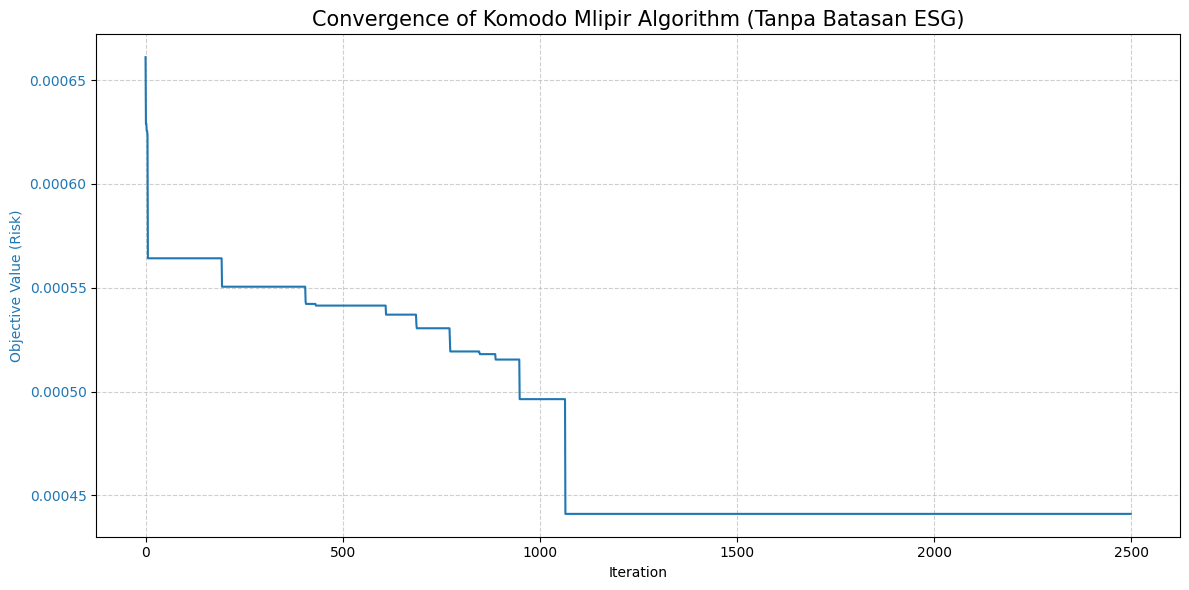

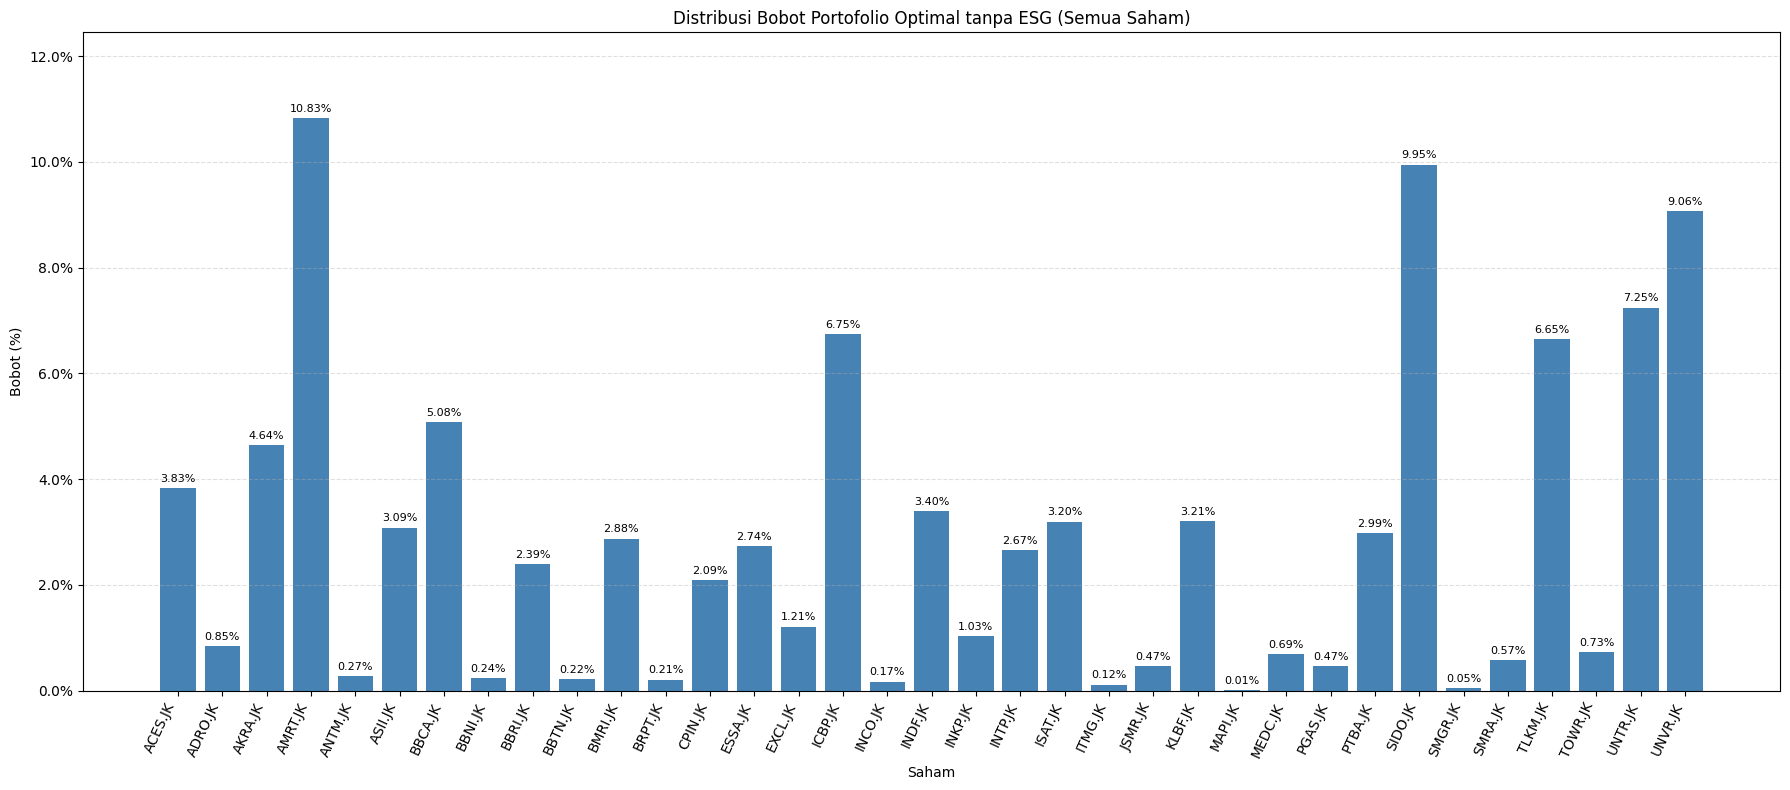

In [ ]:
# --- ALGORITMA KOMODO MLIPIR (UNTUK OPTIMASI PORTOFOLIO) ---
class KomodoMlipirOptimizer:
    """
    Mengimplementasikan Algoritma Komodo Mlipir untuk optimasi portofolio.
    Tujuan: Meminimalkan risiko (variansi) portofolio dengan kendala target return minimum.
    """
    def __init__(self, mu, cov, theta, stock_names, n, p, d, max_iter, mu_p_star=0.0012):
        # Parameter Problem
        self.mu = mu
        self.cov = cov
        self.theta = theta
        self.stock_names = stock_names
        self.dim = len(mu)
        self.mu_p_star = mu_p_star

        # Parameter Algoritma Komodo Mlipir
        self.n = n
        self.p = p
        self.d = d
        self.max_iter = max_iter

        # Inisialisasi populasi (memastikan bobot awal sum=1)
        self.komodos = np.random.dirichlet(np.ones(self.dim), size=self.n)
        self.fitness_values = np.array([self._fitness(k) for k in self.komodos])

        # Inisialisasi solusi terbaik global (k_best)
        best_idx = np.argmin(self.fitness_values)
        self.k_best = self.komodos[best_idx].copy()
        self.best_fitness = self.fitness_values[best_idx]

        # Riwayat untuk plot konvergensi
        self.history = []
        self.return_history = []
        self.risk_history = []
        self.esg_history = []

    def _repair_solution(self, pos):
        """Memastikan bobot tidak negatif dan jumlahnya sama dengan 1."""
        pos = np.maximum(pos, 0)
        s = np.sum(pos)
        return pos / s if s > 0 else np.ones(self.dim) / self.dim

    def _fitness(self, w):
        """Fungsi fitness: meminimalkan risiko (variansi) dengan penalti pada return."""
        ret = np.dot(w, self.mu)
        var = np.dot(w.T, np.dot(self.cov, w))
        penalty_return = max(0, self.mu_p_star - ret)
        return var + 1000 * penalty_return

    def optimize(self):
        """Loop utama dari Algoritma Komodo Mlipir."""
        for it in range(self.max_iter):
            # 1. Hitung fitness dan rangking seluruh populasi
            self.fitness_values = np.array([self._fitness(k) for k in self.komodos])
            sorted_indices = np.argsort(self.fitness_values)

            # 2. Bagi populasi
            q = max(1, int(round(self.n * self.p)))
            if self.n < 3:
                raise ValueError("Ukuran populasi 'n' harus minimal 3.")

            big_males_indices = sorted_indices[:q]
            female_index = sorted_indices[q]
            small_males_indices = sorted_indices[q+1:]

            winner_big_male = self.komodos[big_males_indices[0]]

            # 3. Update Big Males (Eksploitasi)
            for idx in big_males_indices:
                current_pos = self.komodos[idx]
                new_pos = self._repair_solution(current_pos + np.random.rand() * (self.k_best - current_pos))
                self.komodos[idx] = new_pos

            # 4. Update Female (Reproduksi)
            female_pos = self.komodos[female_index]
            if np.random.rand() < 0.5:  # Kawin
                new_female_pos = self._repair_solution(female_pos + np.random.rand() * (winner_big_male - female_pos))
            else:  # Partenogenesis
                mutation = (np.random.rand(self.dim) - 0.5) * 0.1
                new_female_pos = self._repair_solution(female_pos + mutation)
            self.komodos[female_index] = new_female_pos

            # 5. Update Small Males (Eksplorasi "Mlipir")
            for idx in small_males_indices:
                if np.random.rand() < self.d:
                    new_pos = np.random.dirichlet(np.ones(self.dim))
                else:
                    j = np.random.choice(small_males_indices)
                    new_pos = self._repair_solution(self.komodos[idx] + np.random.rand() * (self.komodos[j] - self.komodos[idx]))
                self.komodos[idx] = new_pos

            # 6. Update k_best (solusi terbaik global)
            current_best_idx = np.argmin(self.fitness_values)
            if self.fitness_values[current_best_idx] < self.best_fitness:
                self.best_fitness = self.fitness_values[current_best_idx]
                self.k_best = self.komodos[current_best_idx].copy()

            # 7. Lacak semua metrik di setiap iterasi
            self.history.append(self.best_fitness)
            ret = np.dot(self.k_best, self.mu)
            risk = np.sqrt(np.dot(self.k_best.T, np.dot(self.cov, self.k_best)))
            esg = np.dot(self.k_best, self.theta)
            self.return_history.append(ret)
            self.risk_history.append(risk)
            self.esg_history.append(esg)

        # Mengembalikan hasil optimasi terbaik
        return {
            'objective_value': self.best_fitness,
            'weights': self.k_best,
            'return': self.return_history[-1],
            'risk': self.risk_history[-1],
            'esg': self.esg_history[-1],
        }

    def get_sharpe_ratio(self, risk_free_rate=0):
        port_return = np.dot(self.k_best, self.mu)
        port_risk = np.sqrt(np.dot(self.k_best.T, np.dot(self.cov, self.k_best)))
        return (port_return - risk_free_rate) / port_risk if port_risk != 0 else 0


# --- FUNGSI RINGKASAN DAN VISUALISASI (Tidak ada perubahan) ---
def print_summary(optimizer, result):
    ret = result['return'] * 100
    vol = result['risk'] * 100
    esg = result['esg']
    sharpe = optimizer.get_sharpe_ratio()

    print("\n📊 Portfolio Summary (Tanpa Batasan ESG)")
    print("-" * 50)
    print(f"Expected Weekly Return : {ret:.4f}%")
    print(f"Expected Annual Return : {ret * 52:.2f}%")
    print(f"Portfolio Volatility (Weekly)  : {vol:.4f}%")
    print(f"Portfolio Volatility (Annual)  : {vol * np.sqrt(52):.2f}%")
    print(f"Portfolio ESG Score    : {esg:.2f} (sebagai informasi)")
    print(f"Sharpe Ratio (Weekly)  : {sharpe:.4f}")
    print(f"Sharpe Ratio (Annual)  : {sharpe * np.sqrt(52):.4f}")
    print("-" * 50)
    print(f"Constraint Return ≥ {optimizer.mu_p_star*100:.2f}% : {'✅' if ret/100 >= optimizer.mu_p_star else '❌'}")
    print("-" * 50)

def plot_convergence(optimizer):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Objective Value (Risk)', color=color)
    ax1.plot(optimizer.history, color=color, label='Objective (Risk)')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)
    plt.title('Convergence of Komodo Mlipir Algorithm (Tanpa Batasan ESG)', fontsize=15)
    fig.tight_layout()
    plt.show()

def plot_weights(optimizer):
    weights = optimizer.k_best * 100
    names = optimizer.stock_names
    plt.figure(figsize=(18, 8))
    bars = plt.bar(names, weights, color='steelblue')
    plt.title('Distribusi Bobot Portofolio Optimal tanpa ESG (Semua Saham)')
    plt.xlabel('Saham')
    plt.ylabel('Bobot (%)')
    plt.xticks(rotation=65, ha='right')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    fmt_labels = [f"{w:.2f}%" for w in weights]
    plt.bar_label(bars, labels=fmt_labels, padding=3, fontsize=8, rotation=0)
    plt.grid(axis='y', alpha=0.4, linestyle='--')
    top = max(weights) if len(weights) > 0 else 0
    plt.ylim(top=top * 1.15)
    plt.tight_layout()
    plt.show()


# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    # ASUMSI: Variabel 'expected_returns', 'cov_stock', dan 'esg_df' sudah ada
    # dan berisi data yang diperlukan dari langkah sebelumnya.
    # Contoh data dummy jika file ini dijalankan secara terpisah:
    try:
        expected_returns
    except NameError:
        print("")
        num_assets = 35
        tickers = [f'STOCK_{i+1}' for i in range(num_assets)]
        expected_returns = pd.Series(np.random.rand(num_assets) * 0.005, index=tickers)
        cov_stock = pd.DataFrame(np.random.rand(num_assets, num_assets) * 0.001)
        esg_df = pd.DataFrame({'Ticker': tickers, 'ESG_Score': np.random.rand(num_assets) * 10})

    print("🚀 Optimasi Portfolio dengan Algoritma Komodo MLIPIR (Tanpa Batasan ESG)")
    print("-" * 60)

    # --- PARAMETER ALGORITMA KOMODO MLIPIR (disesuaikan untuk presisi) ---
    N_KOMODO = 100      # n: Ukuran populasi
    P_BIG_MALES = 0.30  # p: Proporsi big males
    D_MLIPIR = 0.2      # d: Mlipir rate
    MAX_ITER = 2500     # Jumlah iterasi
    TARGET_RETURN = 0.0012 # mu_p_star: Target return mingguan

    best_fitness_komodo = float('inf')
    best_weights_komodo = None
    best_result_komodo = None
    best_optimizer_komodo = None
    fitness_list = []
    waktu_list = []

    for run in range(1, 21):
        print(f"\n🔁 Run {run}/20")
        start_time = time.time()

        # Panggil optimizer yang BARU
        optimizer = KomodoMlipirOptimizer(
            mu=expected_returns.values,
            cov=cov_stock.values,
            theta=esg_df['ESG_Score'].values,
            stock_names=esg_df['Ticker'],
            n=N_KOMODO,
            p=P_BIG_MALES,
            d=D_MLIPIR,
            max_iter=MAX_ITER,
            mu_p_star=TARGET_RETURN
        )

        result_komodo = optimizer.optimize()
        elapsed = time.time() - start_time
        waktu_list.append(elapsed)
        fitness_list.append(result_komodo['objective_value'])
        print(f"Run {run} - Fitness: {result_komodo['objective_value']:.8f} | Time: {elapsed:.2f} sec")

        if result_komodo['objective_value'] < best_fitness_komodo:
            best_fitness_komodo = result_komodo['objective_value']
            best_weights_komodo = result_komodo['weights']
            best_result_komodo = result_komodo
            best_optimizer_komodo = optimizer

   # --- STATISTIK ---
    fitness_array = np.array(fitness_list)
    print("\n" + "_"*70)
    print("STATISTIK FITNESS:")
    print(f"Rata-rata (Mean)    : {np.mean(fitness_array):.8f}")
    print(f"Nilai terendah (Min) : {np.min(fitness_array):.8f}")
    print(f"Nilai tertinggi (Max): {np.max(fitness_array):.8f}")
    print(f"Median              : {np.median(fitness_array):.8f}")
    print(f"Variansi            : {np.var(fitness_array):.8f}")

    waktu_array = np.array(waktu_list)
    print("\n" + "_"*70)
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"Rata-rata waktu     : {np.mean(waktu_array):.2f} detik")
    print(f"Waktu tercepat      : {np.min(waktu_array):.2f} detik")
    print(f"Waktu terlama       : {np.max(waktu_array):.2f} detik")
    print(f"Total waktu         : {np.sum(waktu_array):.2f} detik")

    # --- HASIL TERBAIK ---
    print("\n\n🏆 Best Result from 20 Runs (Tanpa Batasan ESG) 🏆")
    print(f"Best Fitness (Risk): {best_result_komodo['objective_value']:.8f}")

    # Menggunakan bobot dari optimizer terbaik yang sudah disimpan
    print("Best Weights Allocation:")
    for name, weight in zip(best_optimizer_komodo.stock_names, best_weights_komodo):
            print(f"{name:<12}: {weight*100:.2f}%")

    # --- Visualisasi dari run terbaik ---
    # Gunakan best_result_komodo yang sudah disimpan untuk konsistensi.
    print_summary(best_optimizer_komodo, best_result_komodo)
    plot_convergence(best_optimizer_komodo)
    plot_weights(best_optimizer_komodo)

# **Dengan ESG 20 Kali**

🚀 Optimasi Portfolio dengan Algoritma Komodo MLIPIR (Dengan Batasan ESG)
------------------------------------------------------------

🔁 Run 1/20
Run 1 - Fitness: 1478.27129201 | Time: 56.73 sec

🔁 Run 2/20
Run 2 - Fitness: 0.00075662 | Time: 55.33 sec

🔁 Run 3/20
Run 3 - Fitness: 0.00195228 | Time: 55.53 sec

🔁 Run 4/20
Run 4 - Fitness: 0.00143593 | Time: 54.86 sec

🔁 Run 5/20
Run 5 - Fitness: 715.81419829 | Time: 55.90 sec

🔁 Run 6/20
Run 6 - Fitness: 1147.05785769 | Time: 54.44 sec

🔁 Run 7/20
Run 7 - Fitness: 69.29572826 | Time: 54.73 sec

🔁 Run 8/20
Run 8 - Fitness: 190.76725481 | Time: 54.26 sec

🔁 Run 9/20
Run 9 - Fitness: 1299.74842597 | Time: 56.20 sec

🔁 Run 10/20
Run 10 - Fitness: 810.36999857 | Time: 54.51 sec

🔁 Run 11/20
Run 11 - Fitness: 978.05383556 | Time: 54.68 sec

🔁 Run 12/20
Run 12 - Fitness: 1203.35990196 | Time: 54.74 sec

🔁 Run 13/20
Run 13 - Fitness: 0.00329302 | Time: 54.60 sec

🔁 Run 14/20
Run 14 - Fitness: 388.87521005 | Time: 54.34 sec

🔁 Run 15/20
Run 15 -

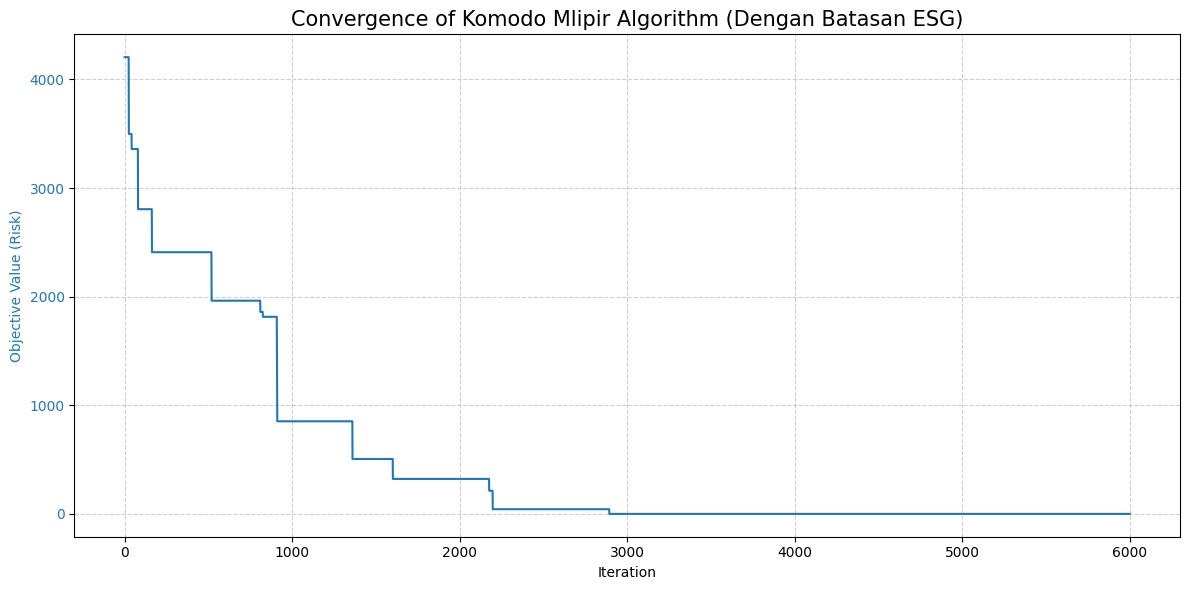

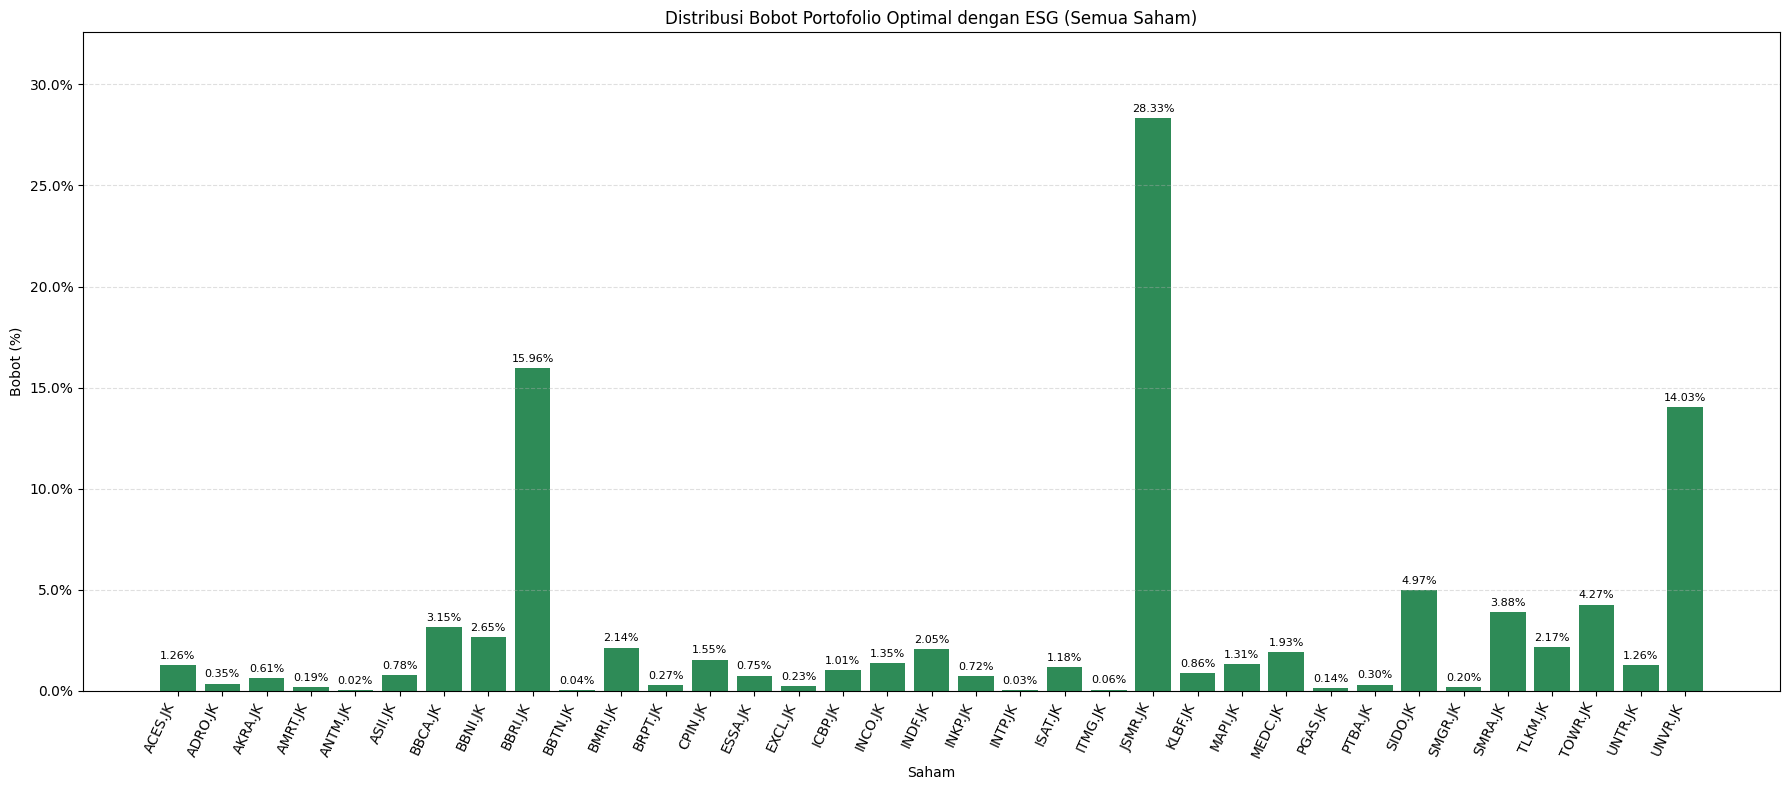

In [ ]:
import numpy as np
import time
import pandas as pd # Ditambahkan untuk data dummy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- ALGORITMA KOMODO MLIPIR DENGAN KENDALA ESG ---
class KomodoMlipirOptimizerESG:
    """
    Mengimplementasikan Algoritma Komodo Mlipir untuk optimasi portofolio.
    Tujuan: Meminimalkan risiko (variansi) dengan kendala target return minimum
            DAN batasan skor ESG maksimum.
    """
    def __init__(self, mu, cov, theta, stock_names, n, p, d, max_iter,
                 mu_p_star=0.0012, theta_p_star=20):
        # Parameter Problem
        self.mu = mu
        self.cov = cov
        self.theta = theta
        self.stock_names = stock_names
        self.dim = len(mu)
        self.mu_p_star = mu_p_star
        self.theta_p_star = theta_p_star

        # Parameter Algoritma Komodo Mlipir
        self.n = n
        self.p = p
        self.d = d
        self.max_iter = max_iter

        # Inisialisasi populasi
        self.komodos = np.random.dirichlet(np.ones(self.dim), size=self.n)
        self.fitness_values = np.array([self._fitness(k) for k in self.komodos])

        # Inisialisasi solusi terbaik global (k_best)
        best_idx = np.argmin(self.fitness_values)
        self.k_best = self.komodos[best_idx].copy()
        self.best_fitness = self.fitness_values[best_idx]

        # Riwayat untuk plot konvergensi
        self.history = []
        self.return_history = []
        self.risk_history = []
        self.esg_history = []

    def _repair_solution(self, pos):
        """Memastikan bobot tidak negatif dan jumlahnya sama dengan 1."""
        pos = np.maximum(pos, 0)
        s = np.sum(pos)
        return pos / s if s > 0 else np.ones(self.dim) / self.dim

    def _fitness(self, w):
        """Fungsi fitness: minimalkan risiko dengan penalti pada return dan ESG."""
        ret = np.dot(w, self.mu)
        var = np.dot(w.T, np.dot(self.cov, w))
        esg = np.dot(w, self.theta)

        penalty_return = max(0, self.mu_p_star - ret)
        # Penalti jika skor ESG lebih TINGGI dari batas maksimal
        penalty_esg = max(0, esg - self.theta_p_star)

        return var + 1000 * (penalty_return + penalty_esg)

    def optimize(self):
        """Loop utama dari Algoritma Komodo Mlipir."""
        for it in range(self.max_iter):
            # 1. Hitung fitness dan rangking seluruh populasi
            self.fitness_values = np.array([self._fitness(k) for k in self.komodos])
            sorted_indices = np.argsort(self.fitness_values)

            # 2. Bagi populasi
            q = max(1, int(round(self.n * self.p)))
            if self.n < 3:
                raise ValueError("Ukuran populasi 'n' harus minimal 3.")

            big_males_indices = sorted_indices[:q]
            female_index = sorted_indices[q]
            small_males_indices = sorted_indices[q+1:]

            winner_big_male = self.komodos[big_males_indices[0]]

            # 3. Update Big Males (Eksploitasi)
            for idx in big_males_indices:
                current_pos = self.komodos[idx]
                new_pos = self._repair_solution(current_pos + np.random.rand() * (self.k_best - current_pos))
                self.komodos[idx] = new_pos

            # 4. Update Female (Reproduksi)
            female_pos = self.komodos[female_index]
            if np.random.rand() < 0.5:  # Kawin
                new_female_pos = self._repair_solution(female_pos + np.random.rand() * (winner_big_male - female_pos))
            else:  # Partenogenesis
                mutation = (np.random.rand(self.dim) - 0.5) * 0.1
                new_female_pos = self._repair_solution(female_pos + mutation)
            self.komodos[female_index] = new_female_pos

            # 5. Update Small Males (Eksplorasi "Mlipir")
            for idx in small_males_indices:
                if np.random.rand() < self.d:
                    new_pos = np.random.dirichlet(np.ones(self.dim))
                else:
                    j = np.random.choice(small_males_indices)
                    new_pos = self._repair_solution(self.komodos[idx] + np.random.rand() * (self.komodos[j] - self.komodos[idx]))
                self.komodos[idx] = new_pos

            # 6. Update k_best (solusi terbaik global)
            current_best_idx = np.argmin(self.fitness_values)
            if self.fitness_values[current_best_idx] < self.best_fitness:
                self.best_fitness = self.fitness_values[current_best_idx]
                self.k_best = self.komodos[current_best_idx].copy()

            # 7. Lacak semua metrik di setiap iterasi
            self.history.append(self.best_fitness)
            ret = np.dot(self.k_best, self.mu)
            risk = np.sqrt(np.dot(self.k_best.T, np.dot(self.cov, self.k_best)))
            esg = np.dot(self.k_best, self.theta)
            self.return_history.append(ret)
            self.risk_history.append(risk)
            self.esg_history.append(esg)

        return {
            'objective_value': self.best_fitness,
            'weights': self.k_best,
            'return': self.return_history[-1],
            'risk': self.risk_history[-1],
            'esg': self.esg_history[-1],
        }

    def get_sharpe_ratio(self, risk_free_rate=0):
        port_return = np.dot(self.k_best, self.mu)
        port_risk = np.sqrt(np.dot(self.k_best.T, np.dot(self.cov, self.k_best)))
        return (port_return - risk_free_rate) / port_risk if port_risk != 0 else 0


# --- FUNGSI RINGKASAN DAN VISUALISASI (Tidak ada perubahan) ---
def print_summary(optimizer, result):
    ret = result['return'] * 100
    vol = result['risk'] * 100
    esg = result['esg']
    sharpe = optimizer.get_sharpe_ratio()

    print("\n📊 Portfolio Summary (Dengan Batasan ESG)")
    print("-" * 50)
    print(f"Expected Weekly Return : {ret:.4f}%")
    print(f"Expected Annual Return : {ret * 52:.2f}%")
    print(f"Portfolio Volatility (Weekly)  : {vol:.4f}%")
    print(f"Portfolio Volatility (Annual)  : {vol * np.sqrt(52):.2f}%")
    print(f"Portfolio ESG Score    : {esg:.2f}")
    print(f"Sharpe Ratio (Weekly)  : {sharpe:.4f}")
    print(f"Sharpe Ratio (Annual)  : {sharpe * np.sqrt(52):.4f}")
    print("-" * 50)
    print(f"Constraint Return ≥ {optimizer.mu_p_star*100:.2f}% : {'✅' if ret/100 >= optimizer.mu_p_star else '❌'}")
    print(f"Constraint ESG ≤ {optimizer.theta_p_star}       : {'✅' if esg <= optimizer.theta_p_star else '❌'}")
    print("-" * 50)

def plot_convergence(optimizer):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Objective Value (Risk)', color=color)
    ax1.plot(optimizer.history, color=color, label='Objective (Risk)')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)
    plt.title('Convergence of Komodo Mlipir Algorithm (Dengan Batasan ESG)', fontsize=15)
    fig.tight_layout()
    plt.show()

def plot_weights(optimizer):
    weights = optimizer.k_best * 100
    names = optimizer.stock_names
    plt.figure(figsize=(18, 8))
    bars = plt.bar(names, weights, color='seagreen')
    plt.title('Distribusi Bobot Portofolio Optimal dengan ESG (Semua Saham)')
    plt.xlabel('Saham')
    plt.ylabel('Bobot (%)')
    plt.xticks(rotation=65, ha='right')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    fmt_labels = [f"{w:.2f}%" for w in weights]
    plt.bar_label(bars, labels=fmt_labels, padding=3, fontsize=8, rotation=0)
    plt.grid(axis='y', alpha=0.4, linestyle='--')
    top = max(weights) if len(weights) > 0 else 0
    plt.ylim(top=top * 1.15)
    plt.tight_layout()
    plt.show()


# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    # ASUMSI: Variabel 'expected_returns', 'cov_stock', dan 'esg_df' sudah ada
    try:
        expected_returns
    except NameError:
        print("")
        num_assets = 35
        tickers = [f'STOCK_{i+1}' for i in range(num_assets)]
        expected_returns = pd.Series(np.random.rand(num_assets) * 0.005, index=tickers)
        cov_stock = pd.DataFrame(np.random.rand(num_assets, num_assets) * 0.001)
        esg_df = pd.DataFrame({'Ticker': tickers, 'ESG_Score': np.random.randint(10, 30, num_assets)})

    print("🚀 Optimasi Portfolio dengan Algoritma Komodo MLIPIR (Dengan Batasan ESG)")
    print("-" * 60)

    # --- PARAMETER ALGORITMA KOMODO MLIPIR (disesuaikan untuk presisi) ---
    N_KOMODO = 300      # n: Ukuran populasi
    P_BIG_MALES = 0.30  # p: Proporsi big males
    D_MLIPIR = 0.2      # d: Mlipir rate
    MAX_ITER = 6000    # Jumlah iterasi
    TARGET_RETURN = 0.0012 # mu_p_star: Target return mingguan
    MAX_ESG_SCORE = 20     # theta_p_star: Batas skor ESG

    best_fitness_komodo_ESG = float('inf')
    best_weights_komodo_ESG = None
    best_result_komodo_ESG = None
    best_optimizer_komodo_ESG = None
    fitness_list = []
    waktu_list = []

    for run in range(1, 21):
        print(f"\n🔁 Run {run}/20")
        start_time = time.time()

        # Panggil optimizer yang BARU
        optimizer = KomodoMlipirOptimizerESG(
            mu=expected_returns.values,
            cov=cov_stock.values,
            theta=esg_df['ESG_Score'].values,
            stock_names=esg_df['Ticker'].values,
            n=N_KOMODO,
            p=P_BIG_MALES,
            d=D_MLIPIR,
            max_iter=MAX_ITER,
            mu_p_star=TARGET_RETURN,
            theta_p_star=MAX_ESG_SCORE
        )

        result_komodo_ESG = optimizer.optimize()
        elapsed = time.time() - start_time
        waktu_list.append(elapsed)
        fitness_list.append(result_komodo_ESG['objective_value'])
        print(f"Run {run} - Fitness: {result_komodo_ESG['objective_value']:.8f} | Time: {elapsed:.2f} sec")

        if result_komodo_ESG['objective_value'] < best_fitness_komodo_ESG:
            best_fitness_komodo_ESG = result_komodo_ESG['objective_value']
            best_weights_komodo_ESG = result_komodo_ESG['weights']
            best_result_komodo_ESG = result_komodo_ESG
            best_optimizer_komodo_ESG = optimizer

    # --- STATISTIK ---
    fitness_array = np.array(fitness_list)
    print("\n" + "_"*70)
    print("STATISTIK FITNESS:")
    print(f"Rata-rata (Mean)    : {np.mean(fitness_array):.8f}")
    print(f"Nilai terendah (Min) : {np.min(fitness_array):.8f}")
    print(f"Nilai tertinggi (Max): {np.max(fitness_array):.8f}")
    print(f"Median              : {np.median(fitness_array):.8f}")
    print(f"Variansi            : {np.var(fitness_array):.8f}")

    waktu_array = np.array(waktu_list)
    print("\n" + "_"*70)
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"Rata-rata waktu     : {np.mean(waktu_array):.2f} detik")
    print(f"Waktu tercepat      : {np.min(waktu_array):.2f} detik")
    print(f"Waktu terlama       : {np.max(waktu_array):.2f} detik")
    print(f"Total waktu         : {np.sum(waktu_array):.2f} detik")

    # --- HASIL TERBAIK ---
    print("\n\n🏆 Best Result from 20 Runs 🏆")
    print(f"Best Fitness (Risk): {best_fitness_komodo_ESG:.8f}")
    print("Best Weights Allocation with ESG:")
    for name, weight in zip(best_optimizer_komodo_ESG.stock_names, best_weights_komodo_ESG):
            print(f"{name:<12}: {weight*100:.2f}%")

    # --- Visualisasi dari run terbaik ---
    print_summary(best_optimizer_komodo_ESG, best_result_komodo_ESG)
    plot_convergence(best_optimizer_komodo_ESG)
    plot_weights(best_optimizer_komodo_ESG)

# **Membandingkan ESG, Tanpa ESG dan LQ 45**

[*********************100%***********************]  36 of 36 completed



📊 Rangkuman Kinerja Portofolio vs LQ45 (2022–2024) 📊
Risk-Free Rate yang Digunakan (Tahunan): 6.65%
-----------------------------------------------------------------------------
                                     ESG      Tanpa ESG     LQ45
-----------------------------------------------------------------------------
Expected Annual Return (%)        :   13.04      16.77       1.93
Annualized Volatility (%)         :   11.78      10.38      12.84
Sharpe Ratio (Annual)             :    0.56       0.99      -0.35
Skor ESG (rata-rata tertimbang)   :   20.00      28.72      28.71
-----------------------------------------------------------------------------


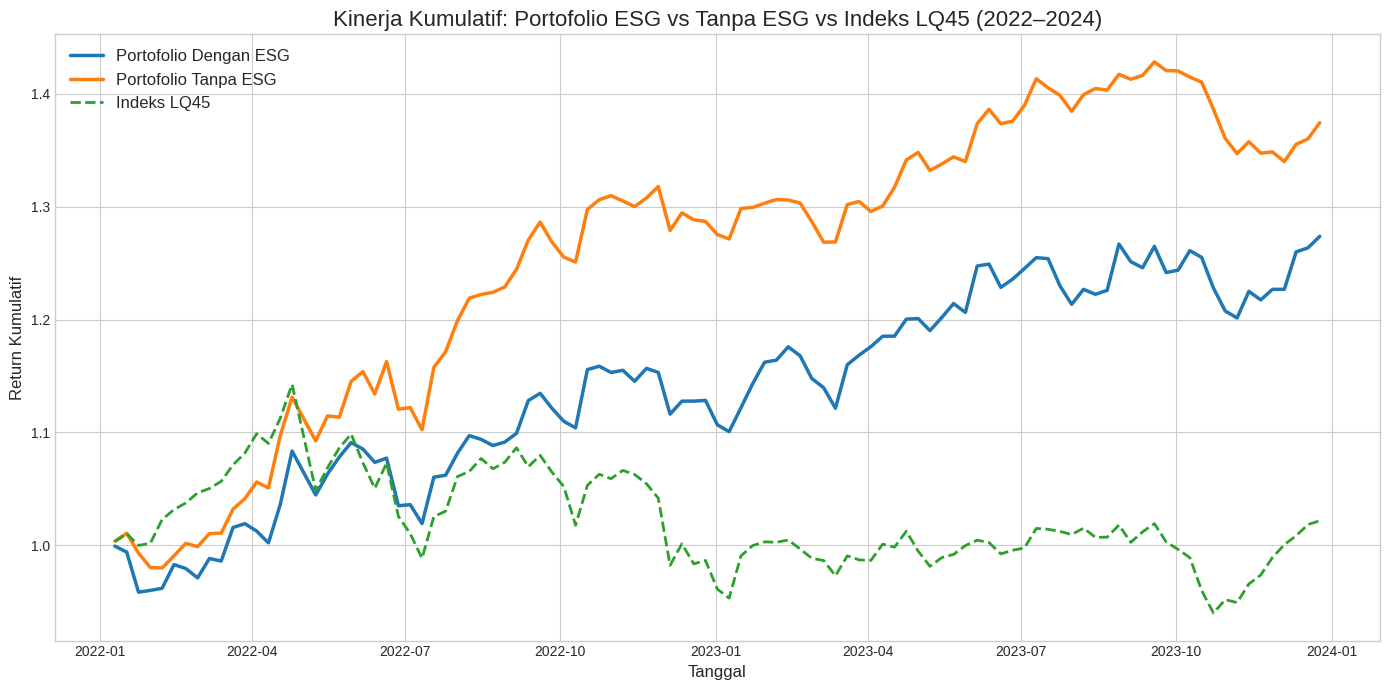


--- Analisis Alokasi Portofolio Dengan ESG ---


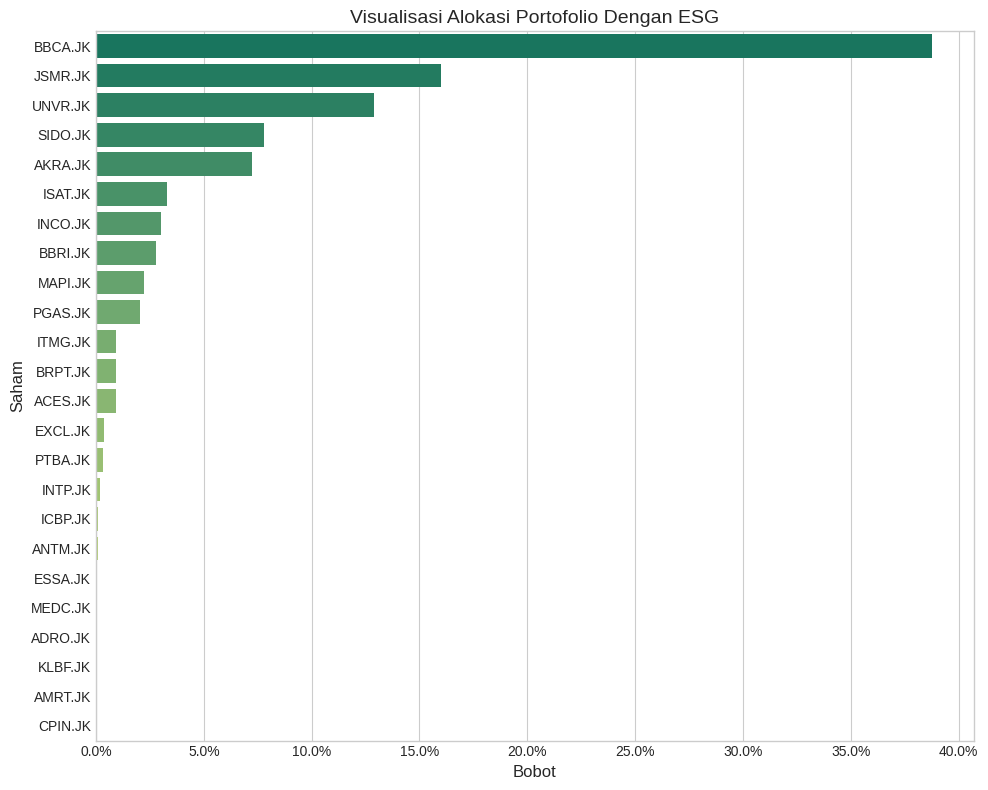

Saham   Bobot
0  BBCA.JK  0.3877
1  JSMR.JK  0.1599
2  UNVR.JK  0.1291
3  SIDO.JK  0.0781
4  AKRA.JK  0.0721
5  ISAT.JK  0.0329
6  INCO.JK  0.0301
7  BBRI.JK  0.0279
8  MAPI.JK  0.0221
9  PGAS.JK  0.0206

✅ File alokasi ESG disimpan sebagai 'alokasi_portofolio_esg_2022_2024.csv'

--- Analisis Alokasi Portofolio Tanpa ESG ---


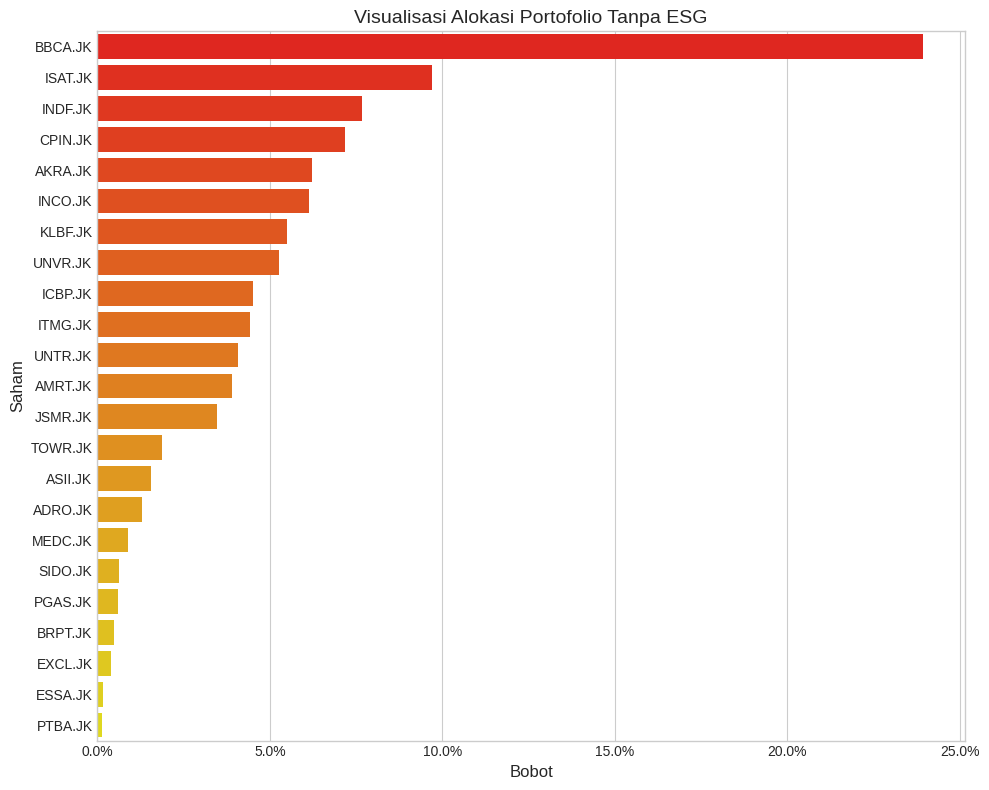

Saham   Bobot
0  BBCA.JK  0.2395
1  ISAT.JK  0.0971
2  INDF.JK  0.0766
3  CPIN.JK  0.0717
4  AKRA.JK  0.0622
5  INCO.JK  0.0614
6  KLBF.JK  0.0550
7  UNVR.JK  0.0526
8  ICBP.JK  0.0452
9  ITMG.JK  0.0441

✅ File alokasi Tanpa ESG disimpan sebagai 'alokasi_portofolio_no_esg_2022_2024.csv'


In [ ]:

# --- PARAMETER ---
start_year = 2022
end_year = 2024

# Validasi rentang tahun
if start_year < 2014 or end_year > 2024 or start_year >= end_year:
    raise ValueError("Rentang tahun harus antara 2014 hingga 2024 dan start_year < end_year")

# Definisikan kedua set bobot portofolio
weights_no_esg = {
    'ACES.JK': 0.0383, 'ADRO.JK': 0.0085, 'AKRA.JK': 0.0464, 'AMRT.JK': 0.1083, 'ANTM.JK': 0.0027,
    'ASII.JK': 0.0309, 'BBCA.JK': 0.0508, 'BBNI.JK': 0.0024, 'BBRI.JK': 0.0239, 'BBTN.JK': 0.0022,
    'BMRI.JK': 0.0288, 'BRPT.JK': 0.0021, 'CPIN.JK': 0.0209, 'ESSA.JK': 0.0274, 'EXCL.JK': 0.0121,
    'ICBP.JK': 0.0675, 'INCO.JK': 0.0017, 'INDF.JK': 0.0340, 'INKP.JK': 0.0103, 'INTP.JK': 0.0267,
    'ISAT.JK': 0.0320, 'ITMG.JK': 0.0012, 'JSMR.JK': 0.0047, 'KLBF.JK': 0.0321, 'MAPI.JK': 0.0001,
    'MEDC.JK': 0.0069, 'PGAS.JK': 0.0047, 'PTBA.JK': 0.0299, 'SIDO.JK': 0.0995, 'SMGR.JK': 0.0005,
    'SMRA.JK': 0.0057, 'TLKM.JK': 0.0665, 'TOWR.JK': 0.0073, 'UNTR.JK': 0.0725, 'UNVR.JK': 0.0906,
}

weights_esg = {
    'ACES.JK': 0.0126, 'ADRO.JK': 0.0035, 'AKRA.JK': 0.0061, 'AMRT.JK': 0.0019, 'ANTM.JK': 0.0002,
    'ASII.JK': 0.0078, 'BBCA.JK': 0.0315, 'BBNI.JK': 0.0265, 'BBRI.JK': 0.1596, 'BBTN.JK': 0.0004,
    'BMRI.JK': 0.0214, 'BRPT.JK': 0.0027, 'CPIN.JK': 0.0155, 'ESSA.JK': 0.0075, 'EXCL.JK': 0.0023,
    'ICBP.JK': 0.0101, 'INCO.JK': 0.0135, 'INDF.JK': 0.0205, 'INKP.JK': 0.0072, 'INTP.JK': 0.0003,
    'ISAT.JK': 0.0118, 'ITMG.JK': 0.0006, 'JSMR.JK': 0.2833, 'KLBF.JK': 0.0086, 'MAPI.JK': 0.0131,
    'MEDC.JK': 0.0193, 'PGAS.JK': 0.0014, 'PTBA.JK': 0.0030, 'SIDO.JK': 0.0497, 'SMGR.JK': 0.0020,
    'SMRA.JK': 0.0388, 'TLKM.JK': 0.0217, 'TOWR.JK': 0.0427, 'UNTR.JK': 0.0126, 'UNVR.JK': 0.1403,
}

tickers = list(weights_esg.keys())



# --- AMBIL DATA SAHAM ---
start_date = f'{start_year}-01-01'
end_date = f'{end_year}-01-01'
data = yf.download(tickers + ['^JKLQ45'], start=start_date, end=end_date, interval='1wk')['Close']
data = data.dropna()
returns = data.pct_change().dropna()

# --- HITUNG RETURN PORTOFOLIO ---
portfolio_weights_esg = np.array([weights_esg[t] for t in tickers])
returns_portfolio_esg = returns[tickers] @ portfolio_weights_esg
portfolio_weights_no_esg = np.array([weights_no_esg[t] for t in tickers])
returns_portfolio_no_esg = returns[tickers] @ portfolio_weights_no_esg

# --- HITUNG RETURN KUMULATIF ---
portfolio_cum_esg = (1 + returns_portfolio_esg).cumprod()
portfolio_cum_no_esg = (1 + returns_portfolio_no_esg).cumprod()
lq45_cum = (1 + returns['^JKLQ45']).cumprod()

# --- HITUNG RISIKO PORTOFOLIO (VOLATILITAS) ---
annual_volatility_esg = returns_portfolio_esg.std() * np.sqrt(52) * 100
annual_volatility_no_esg = returns_portfolio_no_esg.std() * np.sqrt(52) * 100
annual_volatility_lq45 = returns['^JKLQ45'].std() * np.sqrt(52) * 100


# --- FUNGSI PERHITUNGAN METRIK ---
def calculate_metrics(returns_series, start_year, end_year, weekly_risk_free_rate):
    """
    Menghitung metrik kinerja portofolio.
    """
    cumulative_returns = (1 + returns_series).cumprod()
    total_return = (cumulative_returns.iloc[-1] - 1) * 100
    expected_annual_return = returns_series.mean() * 52 * 100

    # Hitung CAGR
    num_years = end_year - start_year
    if num_years > 0:
        annualized_cagr = ((cumulative_returns.iloc[-1]) ** (1 / num_years) - 1) * 100
    else:
        annualized_cagr = total_return

    # Hitung Sharpe Ratio (akurat dengan risk-free rate)
    excess_returns = returns_series.mean() - weekly_risk_free_rate
    sharpe_ratio = (excess_returns / returns_series.std()) * np.sqrt(52)

    return total_return, expected_annual_return, annualized_cagr, sharpe_ratio

# Tentukan risk-free rate di luar fungsi
annual_rf_rate = 0.0665
weekly_rf_rate = (1 + annual_rf_rate)**(1/52) - 1

# Panggil fungsi yang sudah diperbaiki untuk setiap portofolio
total_return_esg, expected_return_esg, cagr_esg, sharpe_esg = calculate_metrics(returns_portfolio_esg, start_year, end_year, weekly_rf_rate)
total_return_no_esg, expected_return_no_esg, cagr_no_esg, sharpe_no_esg = calculate_metrics(returns_portfolio_no_esg, start_year, end_year, weekly_rf_rate)
total_return_lq45, expected_return_lq45, cagr_lq45, sharpe_lq45 = calculate_metrics(returns['^JKLQ45'], start_year, end_year, weekly_rf_rate)


# --- RINGKASAN STATISTIK KOMPARATIF ---
esg_scores_array = np.array([esg_scores[t] for t in tickers])
portfolio_score_esg = np.dot(portfolio_weights_esg, esg_scores_array)
portfolio_score_no_esg = np.dot(portfolio_weights_no_esg, esg_scores_array)
benchmark_score_lq45 = esg_scores_array.mean()

print(f"\n📊 Rangkuman Kinerja Portofolio vs LQ45 ({start_year}–{end_year}) 📊")
print(f"Risk-Free Rate yang Digunakan (Tahunan): {annual_rf_rate:.2%}")
print("-----------------------------------------------------------------------------")
print(f"                                     ESG      Tanpa ESG     LQ45")
print("-----------------------------------------------------------------------------")
print(f"Expected Annual Return (%)        : {expected_return_esg:>7.2f}    {expected_return_no_esg:>7.2f}    {expected_return_lq45:>7.2f}")
print(f"Annualized Volatility (%)         : {annual_volatility_esg:>7.2f}    {annual_volatility_no_esg:>7.2f}    {annual_volatility_lq45:>7.2f}")
print(f"Sharpe Ratio (Annual)             : {sharpe_esg:>7.2f}    {sharpe_no_esg:>7.2f}    {sharpe_lq45:>7.2f}")
print(f"Skor ESG (rata-rata tertimbang)   : {portfolio_score_esg:>7.2f}    {portfolio_score_no_esg:>7.2f}    {benchmark_score_lq45:>7.2f}")
print("-----------------------------------------------------------------------------")


# --- VISUALISASI RETURN KUMULATIF ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cum_esg, label='Portofolio Dengan ESG', linewidth=2.5)
plt.plot(portfolio_cum_no_esg, label='Portofolio Tanpa ESG', linewidth=2.5)
plt.plot(lq45_cum, label='Indeks LQ45', linewidth=2, linestyle='--')
plt.title(f'Kinerja Kumulatif: Portofolio ESG vs Tanpa ESG vs Indeks LQ45 ({start_year}–{end_year})', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Return Kumulatif', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# --- ANALISIS ALOKASI PORTOFOLIO ESG ---
print("\n--- Analisis Alokasi Portofolio Dengan ESG ---")
allocation_esg_df = pd.DataFrame({
    'Saham': tickers,
    'Bobot': list(weights_esg.values())
}).sort_values(by='Bobot', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.barplot(data=allocation_esg_df[allocation_esg_df['Bobot'] > 0], y='Saham', x='Bobot', palette='summer')
plt.title('Visualisasi Alokasi Portofolio Dengan ESG', fontsize=14)
plt.xlabel('Bobot', fontsize=12)
plt.ylabel('Saham', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()
display(allocation_esg_df.head(10))
allocation_esg_df.to_csv(f'alokasi_portofolio_esg_{start_year}_{end_year}.csv', index=False)
print(f"✅ File alokasi ESG disimpan sebagai 'alokasi_portofolio_esg_{start_year}_{end_year}.csv'")


# --- ANALISIS ALOKASI PORTOFOLIO TANPA ESG ---
print("\n--- Analisis Alokasi Portofolio Tanpa ESG ---")
allocation_no_esg_df = pd.DataFrame({
    'Saham': tickers,
    'Bobot': list(weights_no_esg.values())
}).sort_values(by='Bobot', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.barplot(data=allocation_no_esg_df[allocation_no_esg_df['Bobot'] > 0], y='Saham', x='Bobot', palette='autumn')
plt.title('Visualisasi Alokasi Portofolio Tanpa ESG', fontsize=14)
plt.xlabel('Bobot', fontsize=12)
plt.ylabel('Saham', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()
display(allocation_no_esg_df.head(10))
allocation_no_esg_df.to_csv(f'alokasi_portofolio_no_esg_{start_year}_{end_year}.csv', index=False)
print(f"✅ File alokasi Tanpa ESG disimpan sebagai 'alokasi_portofolio_no_esg_{start_year}_{end_year}.csv'")